## Perfil epidemiológico dos beneficiários de planos de saúde  atendidos em Hospitais do Estado da Bahia


### Introdução
O objetivo desta análise é conhecer o perfil epidemiológico dos beneficiários de planos de saúde atendidos em hospitais do Estado da Bahia. Para realização deste trabalho utilizarei dados públicos disponibilizados pela ANS e DATASUS, ao final responderei as seguintes perguntas:
* Quais as principais doenças dos beneficiários de planos de saúde da Bahia? 
* Quem utiliza mais os planos de saúde são os Homens ou as Mulheres?
* Quais categorias de doenças atingem mais os Homens?
* Quais categorias de doenças atingem mais as Mulheres?
* Em que faixa etária os gastos são mais elevados? 
* Em que faixa etária realiza-se mais procedimentos?
* Qual a previsão de gastos com a categoria de doença mais frequente na população de beneficiários de planos de saúde do Estado da Bahia?

### Apresentação dos dados

### D-TISS

O D-TISS é um painel disponibilizado pela Agência Nacional de Saúde Suplementar (ANS) para consultar dados recebidos através do TISS - Troca de Informação em Saúde Suplementar.
Com e esta base é possível visualizar a quantidade e o valor médio praticado em procedimentos ambulatoriais (médicos, laboratórios, clínicas) e a quantidade dos procedimentos realizados em ambiente hospitalar dos estabelecimentos que prestam serviço às operadoras de planos de saúde.
Atualmente, quase 3.000 procedimentos realizados na saúde suplementar estão disponíveis para consulta no D‐TISS. O período inicial dos dados compreende os meses de julho de 2015 a dezembro de 2016.
Os dados disponibilizados correspondem a 901 operadoras, cujas informações de valores de eventos de atenção à saúde informados no TISS correspondem a 64,5% das despesas assistenciais do setor informadas no DIOPS no período.

A base de dados D-TISS utilizada está disponível em: <http://www.ans.gov.br/images/stories/Materiais_para_pesquisa/Perfil_setor/Dados_e_indicadores_do_setor/tiss/hospitalar/BA/TISS_Hospitalar_BA.zip>

São 18 arquivos, cada um correspondendo a um mês.

### CID-10

A CID-10 foi conceituada para padronizar e catalogar as doenças e problemas relacionados à saúde, tendo como referência a Nomenclatura Internacional de Doenças, estabelecida pela Organização Mundial de Saúde, que tem por objetivo criar uma codificação padrão para as doenças.

A CID 10 é formada por uma letra, seguida por três números.

O código formado permite a identificação de todas as doenças conhecidas, bem como de sintomas, queixas de pacientes, aspectos fisiológicos anormais, dentre outros.

A base de dados CID-10 utilizada está disponível em:
<http://www.datasus.gov.br/cid10/V2008/cid10.htm>

São 4 arquivos, CID-10-CAPITULOS, CID-10-GRUPOS, CID-10-CATEGORIAS e CID-10-SUBCATEGORIAS. 

###  Importando bibliotecas

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import random
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import seaborn as sns   
from scipy.stats import boxcox
import warnings

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
%matplotlib inline

### Carga de dados

Para facilitar a análise será necessário juntar os 18 arquivos da base D-TISS en um único Dataframe

In [53]:
# Carregando a base de dados D-TISS
data1 = pd.read_csv('tb_TISS_BA_1507_H.csv', decimal=b',')
data2 = pd.read_csv('tb_TISS_BA_1508_H.csv', decimal=b',')
data3 = pd.read_csv('tb_TISS_BA_1509_H.csv', decimal=b',')
data4 = pd.read_csv('tb_TISS_BA_1510_H.csv', decimal=b',')
data5 = pd.read_csv('tb_TISS_BA_1511_H.csv', decimal=b',') 
data6 = pd.read_csv('tb_TISS_BA_1512_H.csv', decimal=b',')
data7 = pd.read_csv('tb_TISS_BA_1601_H.csv', decimal=b',')
data8 = pd.read_csv('tb_TISS_BA_1602_H.csv', decimal=b',')
data9 = pd.read_csv('tb_TISS_BA_1603_H.csv', decimal=b',')
data10 = pd.read_csv('tb_TISS_BA_1604_H.csv', decimal=b',')
data11 = pd.read_csv('tb_TISS_BA_1605_H.csv', decimal=b',')
data12 = pd.read_csv('tb_TISS_BA_1606_H.csv', decimal=b',')
data13 = pd.read_csv('tb_TISS_BA_1607_H.csv', decimal=b',')
data14 = pd.read_csv('tb_TISS_BA_1608_H.csv', decimal=b',')
data15 = pd.read_csv('tb_TISS_BA_1609_H.csv', decimal=b',')
data16 = pd.read_csv('tb_TISS_BA_1610_H.csv', decimal=b',')
data17 = pd.read_csv('tb_TISS_BA_1611_H.csv', decimal=b',')
data18 = pd.read_csv('tb_TISS_BA_1612_H.csv', decimal=b',')

#  Unindo os 18 arquivos da base D-TISS en um único Dataframe
d_tiss = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18], ignore_index=True)

#Carregando a base de dados CID-10
cid_capitulo = pd.read_csv('CID-10-CAPITULOS.csv', sep=';', encoding='latin-1')
cid_grupo = pd.read_csv('CID-10-GRUPOS.csv', sep=';', encoding='latin-1')
cid_categoria = pd.read_csv('CID-10-CATEGORIAS.csv', sep=';', encoding='latin-1')
cid_subcategorias = pd.read_csv('CID-10-SUBCATEGORIAS.csv', sep=';', encoding='latin-1')


In [3]:
print('O Dataframe d_tiss possui ' + str(d_tiss.shape[0]) + ' linhas e ' + str(d_tiss.shape[1]) + ' colunas')

O Dataframe d_tiss possui 409551 linhas e 17 colunas


In [4]:
print('O Dataframe cid_capitulo possui ' + str(cid_capitulo.shape[0]) + ' linhas e ' + str(cid_capitulo.shape[1]) + ' colunas')

O Dataframe cid_capitulo possui 22 linhas e 6 colunas


In [5]:
print('O Dataframe cid_grupo possui ' + str(cid_grupo.shape[0]) + ' linhas e ' + str(cid_grupo.shape[1]) + ' colunas')

O Dataframe cid_grupo possui 275 linhas e 5 colunas


In [6]:
print('O Dataframe cid_categoria possui ' + str(cid_categoria.shape[0]) + ' linhas e ' + str(cid_categoria.shape[1]) + ' colunas')

O Dataframe cid_categoria possui 2045 linhas e 7 colunas


In [7]:
print('O Dataframe cid_subcategorias possui ' + str(cid_subcategorias.shape[0]) + ' linhas e ' + str(cid_subcategorias.shape[1]) + ' colunas')

O Dataframe cid_subcategorias possui 12451 linhas e 9 colunas


In [8]:
Image(url = 'Dicionario_de_variaveis_dtiss.png')

In [9]:
Image(url = 'Dicionario-de-variaveis-cid-10.png')

### Análise Exploratória

Após unir os 18 arquivos da base de dados D-TISS, correspondente aos procedimentos realizados na saúde suplementar do beneficiários atendidos em Hospitais do Estado da Bahia, ficamos com um dataset com 409551 linhas e 17 colunas.

In [10]:
##### Visualizando as primeiras 10 linhas do dataframe d_tiss
d_tiss.head(10)

,ID_EVENTO,IDENTIFICACAO_BENEFICIARIO,IDADE_BENEFICIARIO,CD_SEXO,IDENTIFICACAO_OPERADORA,PORTE_OPERADORA,IDENTIFICACAO_PRESTADOR,CD_MUNICIPIO_PRESTADOR,UF_PRESTADOR,COMPETENCIA_EVENTO,CID_1,CID_2,CID_3,CID_4,CD_PROCEDIMENTO_TUSS,QTD_PROCEDIMENTO,VALOR_PROCEDIMENTO
0,481457792,CA35C957C68AA63C5B3FB1FE4E14955B,59,3,21060,G,7BB13323C04D168C4C49C79B775BAB7B,293330,BA,201507,R100,-2,-2,-2,4,2,68.86
1,615800527,ECC0ECCAEE82B594A8E3A73CCF268D89,38,3,2015,G,793E053F82F32E308AEAEE8327700D36,292740,BA,201507,-2,-2,-2,-2,1,3,201.26
2,615801444,04E17108FE2FEE7796E35E109F09E640,8,1,2015,G,DE86E971D5DB308B57234D6948311F6B,292740,BA,201507,-2,-2,-2,-2,10102019,1,71.58
3,963706115,F2D8ECAF526A8486EE4264DE3535FCF4,6,3,3170,G,E1B317387A9CD6DB408E55F3CEEEBADB,292740,BA,201507,C711,-2,-2,-2,1,2,70.43
4,615799637,77C52D36D61FC744,42,3,2015,G,DE86E971D5DB308B57234D6948311F6B,292740,BA,201507,-2,-2,-2,-2,10102019,1,71.58
5,963810635,677592C57167436800858909319D1615,41,1,3170,G,2ADBF07DA1BF288F7178F9BDD644D287,291080,BA,201507,K802,-2,-2,-2,27,2,157.40
6,965057529,77C52D36D61FC744,20,1,3170,G,FF710DAB905490C585AE0CA669A4D1DC,290570,BA,201507,I843,-2,-2,-2,31004270,3,1306.85
7,965088297,4FE0089A9C50A64BAB46A46E2F6D383F,65,3,3170,G,5BF7F7473345F3FB6CBE299FA923CBED,292740,BA,201507,H251,-2,-2,-2,30306027,2,2382.64
8,119426515,86A871CE7EFBFF1E1C5ECFB902FB60EC,50,1,1630,M,7BB13323C04D168C4C49C79B775BAB7B,293330,BA,201507,G560,-2,-2,-2,31403204,1,526.50
9,119429105,4B40F37020BF8F8F8F3A0263C40FCC2A,67,1,1630,M,6B3EC302EC53CFB17D49C22104C9D90A,293330,BA,201507,-2,-2,-2,-2,30914078,2,622.40


In [11]:
# Sumário dos dados
d_tiss.describe()

,ID_EVENTO,IDADE_BENEFICIARIO,CD_SEXO,IDENTIFICACAO_OPERADORA,CD_MUNICIPIO_PRESTADOR,COMPETENCIA_EVENTO,CD_PROCEDIMENTO_TUSS,QTD_PROCEDIMENTO,VALOR_PROCEDIMENTO
count,4.095510e+05,409551.000000,409551.000000,409551.00000,409551.000000,409551.000000,4.095510e+05,409551.000000,409551.000000
mean,6.683442e+08,41.256359,2.034968,2300.45923,292402.277724,201575.324008,1.415969e+07,7.898718,548.997847
std,3.094036e+08,23.546215,1.198455,2082.84515,722.819275,44.982071,1.323385e+07,31.138894,1049.154840
min,1.319261e+06,-1.000000,-1.000000,23.00000,290070.000000,201507.000000,1.000000e+00,1.000000,0.000000
25%,4.578335e+08,28.000000,1.000000,1550.00000,292740.000000,201511.000000,9.000000e+00,1.000000,80.845000
50%,7.788005e+08,39.000000,3.000000,2015.00000,292740.000000,201603.000000,1.010302e+07,2.000000,245.750000
75%,9.640112e+08,58.000000,3.000000,3170.00000,292740.000000,201607.000000,3.073110e+07,4.000000,648.960000
max,9.658329e+08,110.000000,3.000000,21060.00000,293330.000000,201612.000000,3.160234e+07,4290.000000,114794.620000


In [12]:
d_tiss.dtypes

ID_EVENTO                       int64
IDENTIFICACAO_BENEFICIARIO     object
IDADE_BENEFICIARIO              int64
CD_SEXO                         int64
IDENTIFICACAO_OPERADORA         int64
PORTE_OPERADORA                object
IDENTIFICACAO_PRESTADOR        object
CD_MUNICIPIO_PRESTADOR          int64
UF_PRESTADOR                   object
COMPETENCIA_EVENTO              int64
CID_1                          object
CID_2                          object
CID_3                          object
CID_4                          object
CD_PROCEDIMENTO_TUSS            int64
QTD_PROCEDIMENTO                int64
VALOR_PROCEDIMENTO            float64
dtype: object

In [13]:
# Visualizando as primeiras 10 linhas do dataframe cid_capitulo
cid_capitulo.head(10)

,NUMCAP,CATINIC,CATFIM,DESCRICAO,DESCRABREV,Unnamed: 5
0,1,A00,B99,Capítulo I - Algumas doenças infecciosas e par...,I. Algumas doenças infecciosas e parasitárias,NaN
1,2,C00,D48,Capítulo II - Neoplasias [tumores],II. Neoplasias (tumores),NaN
2,3,D50,D89,Capítulo III - Doenças do sangue e dos órgãos...,III. Doenças sangue órgãos hemat e transt imun...,NaN
3,4,E00,E90,"Capítulo IV - Doenças endócrinas, nutricionais...",IV. Doenças endócrinas nutricionais e metaból...,NaN
4,5,F00,F99,Capítulo V - Transtornos mentais e comportamen...,V. Transtornos mentais e comportamentais,NaN
5,6,G00,G99,Capítulo VI - Doenças do sistema nervoso,VI. Doenças do sistema nervoso,NaN
6,7,H00,H59,Capítulo VII - Doenças do olho e anexos,VII. Doenças do olho e anexos,NaN
7,8,H60,H95,Capítulo VIII - Doenças do ouvido e da apófise...,VIII.Doenças do ouvido e da apófise mastóide,NaN
8,9,I00,I99,Capítulo IX - Doenças do aparelho circulatório,IX. Doenças do aparelho circulatório,NaN
9,10,J00,J99,Capítulo X - Doenças do aparelho respiratório,X. Doenças do aparelho respiratório,NaN


In [14]:
cid_capitulo.dtypes

NUMCAP          int64
CATINIC        object
CATFIM         object
DESCRICAO      object
DESCRABREV     object
Unnamed: 5    float64
dtype: object

In [15]:
# Visualizando as primeiras 10 linhas do dataframe cid_categorias
cid_categoria.head(10)

,CAT,CLASSIF,DESCRICAO,DESCRABREV,REFER,EXCLUIDOS,Unnamed: 6
0,A00,NaN,Cólera,A00 Colera,NaN,NaN,NaN
1,A01,NaN,Febres tifóide e paratifóide,A01 Febres tifoide e paratifoide,NaN,NaN,NaN
2,A02,NaN,Outras infecções por Salmonella,A02 Outr infecc p/Salmonella,NaN,NaN,NaN
3,A03,NaN,Shiguelose,A03 Shiguelose,NaN,NaN,NaN
4,A04,NaN,Outras infecções intestinais bacterianas,A04 Outr infecc intestinais bacter,NaN,NaN,NaN
5,A05,NaN,"Outras intoxicações alimentares bacterianas, n...",A05 Outr intox alimentares bacter NCOP,NaN,NaN,NaN
6,A06,NaN,Amebíase,A06 Amebiase,NaN,NaN,NaN
7,A07,NaN,Outras doenças intestinais por protozoários,A07 Outr doenc intestinais p/protozoarios,NaN,NaN,NaN
8,A08,NaN,"Infecções intestinais virais, outras e as não ...",A08 Infecc intestinais virais outr e as NE,NaN,NaN,NaN
9,A09,NaN,Diarréia e gastroenterite de origem infecciosa...,A09 Diarreia e gastroenterite orig infecc pr...,NaN,NaN,NaN


In [16]:
cid_categoria.dtypes

CAT            object
CLASSIF        object
DESCRICAO      object
DESCRABREV     object
REFER          object
EXCLUIDOS     float64
Unnamed: 6    float64
dtype: object

In [17]:
# Visualizando as primeiras 10 linhas do dataframe cid_subcategorias
cid_subcategorias.head(10)

,SUBCAT,CLASSIF,RESTRSEXO,CAUSAOBITO,DESCRICAO,DESCRABREV,REFER,EXCLUIDOS,Unnamed: 8
0,A000,NaN,NaN,NaN,"Cólera devida a Vibrio cholerae 01, biótipo ch...",A00.0 Colera dev Vibrio cholerae 01 biot cholerae,NaN,NaN,NaN
1,A001,NaN,NaN,NaN,"Cólera devida a Vibrio cholerae 01, biótipo El...",A00.1 Colera dev Vibrio cholerae 01 biot El Tor,NaN,NaN,NaN
2,A009,NaN,NaN,NaN,Cólera não especificada,A00.9 Colera NE,NaN,NaN,NaN
3,A010,NaN,NaN,NaN,Febre tifóide,A01.0 Febre tifoide,NaN,NaN,NaN
4,A011,NaN,NaN,NaN,Febre paratifóide A,A01.1 Febre paratifoide A,NaN,NaN,NaN
5,A012,NaN,NaN,NaN,Febre paratifóide B,A01.2 Febre paratifoide B,NaN,NaN,NaN
6,A013,NaN,NaN,NaN,Febre paratifóide C,A01.3 Febre paratifoide C,NaN,NaN,NaN
7,A014,NaN,NaN,NaN,Febre paratifóide não especificada,A01.4 Febre paratifoide NE,NaN,NaN,NaN
8,A020,NaN,NaN,NaN,Enterite por salmonela,A02.0 Enterite p/salmonela,NaN,NaN,NaN
9,A021,NaN,NaN,NaN,Septicemia por salmonela,A02.1 Septicemia p/salmonela,NaN,NaN,NaN


In [18]:
cid_subcategorias.dtypes

SUBCAT         object
CLASSIF        object
RESTRSEXO      object
CAUSAOBITO     object
DESCRICAO      object
DESCRABREV     object
REFER          object
EXCLUIDOS      object
Unnamed: 8    float64
dtype: object

### Limpeza e Transformação dos dados

Primeiramente eliminarei algumas colunas da base de dados D-TISS que não interessam para análise proposta. Começarei pelas colunas CID_2, CID_3, CID_4, pois trabalharei apenas com o CID primeiro diagnóstico ou diagnóstico principal. Eliminarei também as colunas IDENTIFICACAO_OPERADORA e IDENTIFICACAO_PRESTADOR, pois de acordo com o dicionário de variáveis D-TISS são informações criptografadas, depois as colunas PORTE_OPERADORA e UF_PRESTADOR. 

In [54]:
# Criando um novo dataframe a partir do d_tiss
d_tiss_tratado = d_tiss.copy()

# Eliminando colunas que não serão utilizadas
d_tiss_tratado.drop(['CID_2', 'CID_3', 'CID_4', 'IDENTIFICACAO_OPERADORA', 'IDENTIFICACAO_PRESTADOR', 
               'PORTE_OPERADORA', 'UF_PRESTADOR'], axis = 1, inplace = True)

# Transformando a coluna CID_1 para o tipo str
d_tiss_tratado['CID_1'] = d_tiss_tratado['CID_1'].astype('str')

Como o objetivo principal da análise é conhecer o perfil epidemiológico dos beneficiários de planos de saúde do Estado da Bahia  atendidos em hospitais, faz-se necessário eliminar os registros que não possui o CID diagnóstico principal.

In [71]:
# Eliminando os registros que não possui o CID Diagnostico principal
d_tiss_tratado = d_tiss_tratado[(d_tiss_tratado.CID_1 != '-1') & (d_tiss_tratado.CID_1 != '-2')]
print('O Dataframe d_tiss_tratado possui ' + str(d_tiss_tratado.shape[0]) + ' linhas e ' + str(d_tiss_tratado.shape[1]) + ' colunas')

O Dataframe d_tiss_tratado possui 162131 linhas e 21 colunas


Após excluir os registros que não possui o CID de diagnóstico principal, restaram 162131 linhas e 10 colunas. Agora será necessário acrescentar outras colunas para ajudar no processo de análise e responder as perguntas. Começarei realizando uma série de operações cujo objetivo é unir informações para que seja possível identtificar a Classificação Estatística Internacional de Doenças e Problemas Relacionados com a Saúde de acordo com o Capítulo, Categoria e Subcategoria do CID primeiro diagnóstico ou diagnóstico principal. 

In [56]:
# Função para localizar um caracter detro de uma string
def find(str1, ch):
    indice = 0
    while indice < len(str1):
        if str1[indice] == ch:
            return indice
        indice = indice + 1
    return -1

In [57]:
# Criando os dataframes cid_capit e cid_subcat
cid_capit  = cid_capitulo[['NUMCAP','DESCRICAO']].copy()
cid_categ  = cid_categoria[['CAT','DESCRICAO']].copy()
cid_subcat = cid_subcategorias[['SUBCAT','RESTRSEXO', 'DESCRICAO']].copy()

# Renomeando as colunas do dataframe cid_categ
cid_categ.columns = ['CID_CAT','CID_CATEGORIA']


# Renomeando as colunas do dataframe cid_capit
cid_capit.columns = ['CID_NUMCAP','CID_CAPITULO']

# Eliminado da descrição do capítulo a parte que faz referencia ao capítulo em si
cid_capit['CID_CAPITULO'] = cid_capit.apply(lambda row: ''.join(row['CID_CAPITULO'])[find(''.join(row['CID_CAPITULO']),'-')+2:len(''.join(row['CID_CAPITULO']))],axis=1) 

# Renomeando as colunas do dataframe cid_subcat
cid_subcat.columns = ['CID_SUBCAT','CID_RESTRSEX','CID_SUBCATEGORIA']

In [59]:
# Identificando em qual capítulo do CID o CID do diagnóstico principal pertence 
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 1 if (row['CID_1'][0:3].strip() >= 'A00') & (row['CID_1'][0:3].strip() <= 'B99') else '-1', axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 2 if (row['CID_1'][0:3].strip() >= 'C00') & (row['CID_1'][0:3].strip() <= 'D48') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 3 if (row['CID_1'][0:3].strip() >= 'D50') & (row['CID_1'][0:3].strip() <= 'D89') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 4 if (row['CID_1'][0:3].strip() >= 'E00') & (row['CID_1'][0:3].strip() <= 'E90') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 5 if (row['CID_1'][0:3].strip() >= 'F00') & (row['CID_1'][0:3].strip() <= 'F99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 6 if (row['CID_1'][0:3].strip() >= 'G00') & (row['CID_1'][0:3].strip() <= 'G99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 7 if (row['CID_1'][0:3].strip() >= 'H00') & (row['CID_1'][0:3].strip() <= 'H59') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 8 if (row['CID_1'][0:3].strip() >= 'H60') & (row['CID_1'][0:3].strip() <= 'H95') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 9 if (row['CID_1'][0:3].strip() >= 'I00') & (row['CID_1'][0:3].strip() <= 'I99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 10 if (row['CID_1'][0:3].strip() >= 'J00') & (row['CID_1'][0:3].strip() <= 'J99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 11 if (row['CID_1'][0:3].strip() >= 'K00') & (row['CID_1'][0:3].strip() <= 'K93') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 12 if (row['CID_1'][0:3].strip() >= 'L00') & (row['CID_1'][0:3].strip() <= 'L99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 13 if (row['CID_1'][0:3].strip() >= 'M00') & (row['CID_1'][0:3].strip() <= 'M99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 14 if (row['CID_1'][0:3].strip() >= 'N00') & (row['CID_1'][0:3].strip() <= 'N99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 15 if (row['CID_1'][0:3].strip() >= 'O00') & (row['CID_1'][0:3].strip() <= 'O99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 16 if (row['CID_1'][0:3].strip() >= 'P00') & (row['CID_1'][0:3].strip() <= 'P96') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 17 if (row['CID_1'][0:3].strip() >= 'Q00') & (row['CID_1'][0:3].strip() <= 'Q99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 18 if (row['CID_1'][0:3].strip() >= 'R00') & (row['CID_1'][0:3].strip() <= 'R99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 19 if (row['CID_1'][0:3].strip() >= 'S00') & (row['CID_1'][0:3].strip() <= 'T98') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 20 if (row['CID_1'][0:3].strip() >= 'V01') & (row['CID_1'][0:3].strip() <= 'Y98') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 21 if (row['CID_1'][0:3].strip() >= 'Z00') & (row['CID_1'][0:3].strip() <= 'Z99') else row['CID_NUMCAP'], axis=1)
d_tiss_tratado['CID_NUMCAP'] = d_tiss_tratado.apply(lambda row: 22 if (row['CID_1'][0:3].strip() >= 'U04') & (row['CID_1'][0:3].strip() <= 'U99') else row['CID_NUMCAP'], axis=1)

In [24]:
d_tiss_tratado2 = d_tiss_tratado.copy()

In [ ]:
d_tiss_tratado = d_tiss_tratado2.copy()

In [ ]:
d_tiss_tratado.dtypes

In [61]:
# Identificando em qual categoria do CID o CID subcategoria pertence  
d_tiss_tratado['CID_CAT'] = d_tiss_tratado.apply(lambda row: row['CID_1'][0:3], axis=1)

# Fazendo merge com os dataframes cid_capit, cid_categ, sid_subcateg
d_tiss_tratado = d_tiss_tratado.merge(cid_capit,  left_on='CID_NUMCAP', right_on='CID_NUMCAP', how='left')
d_tiss_tratado = d_tiss_tratado.merge(cid_categ,  left_on='CID_CAT', right_on='CID_CAT', how='left')
d_tiss_tratado = d_tiss_tratado.merge(cid_subcat,  left_on='CID_1', right_on='CID_SUBCAT', how='left')

### Preenchendo dados faltantes

In [26]:
print('O Dataframe d_tiss_tratado possui ' + str(d_tiss_tratado[(d_tiss_tratado.CD_SEXO == -1)].shape[0]) + 
      ' linhas que não possuem a informação de sexo do beneficiário informado')

O Dataframe d_tiss_tratado possui 11162 linhas que não possuem a informação de sexo do beneficiário informado


Após eliminar os registros que não possuíam o CID diagnostico principal restaram 162131 linhas, sendo que destas 11162 não possuem a informação do sexo do beneficiário. Alguns CIDs são restritos ao sexo do paciente, através desta informação é possível identificar o sexo de alguns beneficiários que não possui o registro desta informação. Usarei este recurso para preencher sexo de alguns pacientes que falta esta informação.

In [63]:
# Atualizando a coluna CD_SEXO dos registros faltantes de acordo com o campo RESTRSEXO correspondente ao CID diagnóstico principal
d_tiss_tratado['CD_SEXO'] = d_tiss_tratado.apply(lambda row: 1 if (row['CID_RESTRSEX'] == 'M') else row['CD_SEXO'], axis=1)
d_tiss_tratado['CD_SEXO'] = d_tiss_tratado.apply(lambda row: 3 if (row['CID_RESTRSEX'] == 'F') else row['CD_SEXO'], axis=1)

In [28]:
print('O Dataframe d_tiss_tratado possui ' + str(d_tiss_tratado[(d_tiss_tratado.CD_SEXO == -1)].shape[0]) + ' linhas sem o sexo do beneficiário informado')

O Dataframe d_tiss_tratado possui 9517 linhas sem o sexo do beneficiário informado


Após preencher a coluna CD_SEXO de acordo com a coluna RESTRSEXO correspondente ao CID diagnóstico principal restaram 9517 sem a informação do sexo do beneficiário. Agora utilizarei uma outra abordagem para preencher o sexo do beneficiário dos 9517 registros que restaram através da maior frequência por CID diagnóstico principal.

In [29]:
# Alterando o valores faltantes da coluna CD_SEXO de -1 para NaN 
d_tiss_tratado['CD_SEXO'] = d_tiss_tratado.apply(lambda row: np.nan if (row['CD_SEXO'] == -1) else row['CD_SEXO'], axis=1)

# Criando um novo dataframe com a frequencia de sexo por CID 
frequencia_sexo = d_tiss_tratado.groupby(["CID_1","CD_SEXO"]).CD_SEXO.count().astype('int64').reset_index(name='FREQUENCIA_SEXO')

# Agrupando o sexo mais frequente por CID
frequencia_sexo = frequencia_sexo.groupby(["CD_SEXO","CID_1"]).FREQUENCIA_SEXO.max().astype('int64').reset_index(name='FREQUENCIA_SEXO')

# Eliminando a coluna FREQUENCIA_SEXO
frequencia_sexo.drop('FREQUENCIA_SEXO', axis = 1, inplace = True)

# Renomeando as coluna 
frequencia_sexo.columns = ['CD_SEXO_MAIS_FREQUENTE','CID_1']

# Fazendo merge com os dataframes frequencia_sexo e d_tiss_tratado
d_tiss_tratado = d_tiss_tratado.merge(frequencia_sexo,  left_on='CID_1', right_on='CID_1', how='left')

d_tiss_tratado['CD_SEXO'].fillna(d_tiss_tratado['CD_SEXO_MAIS_FREQUENTE'], inplace=True)
d_tiss_tratado['CD_SEXO'].fillna(-1, inplace=True)
d_tiss_tratado['CD_SEXO'] = d_tiss_tratado['CD_SEXO'].astype('int64')
d_tiss_tratado.drop('CD_SEXO_MAIS_FREQUENTE', axis = 1, inplace = True)

In [30]:
print('O Dataframe d_tiss_tratado possui ' + str(d_tiss_tratado[(d_tiss_tratado.CD_SEXO == -1)].shape[0]) + ' linhas sem o sexo do beneficiário informado')

O Dataframe d_tiss_tratado possui 387 linhas sem o sexo do beneficiário informado


In [31]:
d_tiss_tratado.head()

,ID_EVENTO,IDENTIFICACAO_BENEFICIARIO,IDADE_BENEFICIARIO,CD_SEXO,CD_MUNICIPIO_PRESTADOR,COMPETENCIA_EVENTO,CID_1,CD_PROCEDIMENTO_TUSS,QTD_PROCEDIMENTO,VALOR_PROCEDIMENTO,CID_NUMCAP,CID_CAT,CID_CAPITULO,CID_CATEGORIA,CID_SUBCAT,CID_RESTRSEX,CID_SUBCATEGORIA
0,481457792,CA35C957C68AA63C5B3FB1FE4E14955B,59,3,293330,201507,R100,4,2,68.86,18,R10,"Sintomas, sinais e achados anormais de exames ...",Dor abdominal e pélvica,R100,NaN,Abdome agudo
1,481457792,CA35C957C68AA63C5B3FB1FE4E14955B,59,3,293330,201507,R100,4,2,68.86,18,R10,"Sintomas, sinais e achados anormais de exames ...",Dor abdominal e pélvica,R100,NaN,Abdome agudo
2,963706115,F2D8ECAF526A8486EE4264DE3535FCF4,6,3,292740,201507,C711,1,2,70.43,2,C71,Neoplasias [tumores],Neoplasia maligna do encéfalo,C711,NaN,Neoplasia maligna do lobo frontal
3,963706115,F2D8ECAF526A8486EE4264DE3535FCF4,6,3,292740,201507,C711,1,2,70.43,2,C71,Neoplasias [tumores],Neoplasia maligna do encéfalo,C711,NaN,Neoplasia maligna do lobo frontal
4,963810635,677592C57167436800858909319D1615,41,1,291080,201507,K802,27,2,157.40,11,K80,Doenças do aparelho digestivo,Colelitíase,K802,NaN,Calculose da vesícula biliar sem colecistite


In [66]:
# Separando em colunas sexo masculino e sexo feminino a partir da coluna CD_SEXO
d_tiss_tratado['FEMININO'] = d_tiss_tratado.apply(lambda row: 1 if (row['CD_SEXO'] == 3) else 0, axis=1)
d_tiss_tratado['MASCULINO'] = d_tiss_tratado.apply(lambda row: 1 if (row['CD_SEXO'] == 1) else 0, axis=1)

In [33]:
print('O Dataframe d_tiss_tratado possui ' + str(d_tiss_tratado[(d_tiss_tratado.IDADE_BENEFICIARIO == -1)].shape[0]) + 
      ' linhas que não possuem a informação de idade do beneficiário informado')

O Dataframe d_tiss_tratado possui 19617 linhas que não possuem a informação de idade do beneficiário informado


Utilizarei como estratégia para preenchimento da idade dos beneficiários que não possuem esta informação a média das idades agrupadas por CID. Primeiramente irei criar um novo dataframe contendo o CID e a média de idade com base no dataframe d_tiss_tratado, depois farei um merge e por último farei um apply na idade dos beneficiários que estão sem essa informação.  

In [68]:
# Criando um novo dataframe com a media de idade por CID 
media_idade = d_tiss_tratado.groupby(["CID_1"]).IDADE_BENEFICIARIO.mean().astype('int64').reset_index(name='MEDIA_IDADE')

# Fazendo um merge do dataframe media_idade com o dataframe d_tiss_tratado para acrescentar a coluna MEDIA_IDADE
d_tiss_tratado = d_tiss_tratado.merge(media_idade,  left_on='CID_1', right_on='CID_1', how='left')

# Atualizando a coluna IDADE_BENEFICIARIO de acordo com o campo MEDIA_IDADE por CID diagnóstico principal, apenas para os registros faltantes
d_tiss_tratado['IDADE_BENEFICIARIO'] = d_tiss_tratado.apply(lambda row: row['MEDIA_IDADE'] if (row['IDADE_BENEFICIARIO'] == -1) else row['IDADE_BENEFICIARIO'], axis=1)

In [35]:
print('O Dataframe d_tiss_tratado possui ' + str(d_tiss_tratado[(d_tiss_tratado.IDADE_BENEFICIARIO == -1)].shape[0]) + 
      ' linhas que não possuem a informação de idade do beneficiário informado')

O Dataframe d_tiss_tratado possui 409 linhas que não possuem a informação de idade do beneficiário informado


In [36]:
d_tiss_tratado.dtypes

ID_EVENTO                       int64
IDENTIFICACAO_BENEFICIARIO     object
IDADE_BENEFICIARIO              int64
CD_SEXO                         int64
CD_MUNICIPIO_PRESTADOR          int64
COMPETENCIA_EVENTO              int64
CID_1                          object
CD_PROCEDIMENTO_TUSS            int64
QTD_PROCEDIMENTO                int64
VALOR_PROCEDIMENTO            float64
CID_NUMCAP                      int64
CID_CAT                        object
CID_CAPITULO                   object
CID_CATEGORIA                  object
CID_SUBCAT                     object
CID_RESTRSEX                   object
CID_SUBCATEGORIA               object
FEMININO                        int64
MASCULINO                       int64
MEDIA_IDADE                     int64
dtype: object

In [70]:
# Criando a faixa etária de acordo com a classificação do IBGE
bins = [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,200]
labels=['0 a 4 anos','5 a 9 anos','10 a 14 anos','15 a 19 anos','20 a 24 anos','25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 a 64 anos','65 a 69 anos','70 a 74 anos','75 a 79 anos','80 a 84 anos','85 a 89 anos','90 a 94 anos','95 a 99 anos','Mais de 100 anos']
#labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
d_tiss_tratado['FAIXA_ETARIA'] = pd.cut(d_tiss_tratado['IDADE_BENEFICIARIO'], bins=bins, labels=labels, include_lowest=True)

In [38]:
d_tiss_tratado.dtypes

ID_EVENTO                        int64
IDENTIFICACAO_BENEFICIARIO      object
IDADE_BENEFICIARIO               int64
CD_SEXO                          int64
CD_MUNICIPIO_PRESTADOR           int64
COMPETENCIA_EVENTO               int64
CID_1                           object
CD_PROCEDIMENTO_TUSS             int64
QTD_PROCEDIMENTO                 int64
VALOR_PROCEDIMENTO             float64
CID_NUMCAP                       int64
CID_CAT                         object
CID_CAPITULO                    object
CID_CATEGORIA                   object
CID_SUBCAT                      object
CID_RESTRSEX                    object
CID_SUBCATEGORIA                object
FEMININO                         int64
MASCULINO                        int64
MEDIA_IDADE                      int64
FAIXA_ETARIA                  category
dtype: object

In [50]:
d_tiss_tratado.describe()

,ID_EVENTO,IDADE_BENEFICIARIO,CD_SEXO,CD_MUNICIPIO_PRESTADOR,COMPETENCIA_EVENTO,CD_PROCEDIMENTO_TUSS,QTD_PROCEDIMENTO,VALOR_PROCEDIMENTO,CID_NUMCAP,FEMININO,MASCULINO,MEDIA_IDADE
count,2.870060e+05,287006.000000,287006.000000,287006.000000,287006.000000,2.870060e+05,287006.000000,287006.000000,287006.000000,287006.000000,287006.000000,287006.000000
mean,7.571487e+08,42.243072,2.125621,292343.563114,201573.938590,1.291640e+07,8.447635,470.399581,11.879421,0.564159,0.434493,39.352125
std,3.138440e+08,21.311291,0.997502,789.304744,45.771607,1.290509e+07,26.939113,805.734040,5.535306,0.495867,0.495691,13.683945
min,1.319261e+06,-1.000000,-1.000000,290070.000000,201507.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,5.428393e+08,29.000000,1.000000,292530.000000,201511.000000,9.000000e+00,1.000000,68.625000,9.000000,0.000000,0.000000,30.000000
50%,9.639169e+08,39.000000,3.000000,292740.000000,201603.000000,1.010202e+07,2.000000,212.350000,13.000000,1.000000,0.000000,38.000000
75%,9.650840e+08,57.000000,3.000000,292740.000000,201608.000000,3.050112e+07,5.000000,571.710000,16.000000,1.000000,1.000000,49.000000
max,9.658329e+08,105.000000,3.000000,293330.000000,201612.000000,3.160222e+07,1826.000000,28672.000000,21.000000,1.000000,1.000000,100.000000


In [ ]:
d_tiss_tratado.head()

In [72]:
d_tiss_tratado.shape[0]

162131

In [ ]:
# Salvando dataset tratado
d_tiss_tratado.to_csv('d_tiss_tratado.csv')

In [73]:
# Criando um dataframe para construir uma piramide etária
piramide_etaria = d_tiss_tratado.groupby("FAIXA_ETARIA")["FEMININO","MASCULINO","VALOR_PROCEDIMENTO"].sum().reset_index()
piramide_etaria["PERC_FEMININO"] = (piramide_etaria["FEMININO"] / (piramide_etaria["FEMININO"]+piramide_etaria["MASCULINO"])).astype('float64')
piramide_etaria["PERC_MASCULINO"] = (piramide_etaria["MASCULINO"] / (piramide_etaria["FEMININO"]+piramide_etaria["MASCULINO"])).astype('float64')
piramide_etaria["VALOR_FEMININO"] = round(piramide_etaria["VALOR_PROCEDIMENTO"] * piramide_etaria["PERC_FEMININO"],2)
piramide_etaria["VALOR_MASCULINO"] = round(piramide_etaria["VALOR_PROCEDIMENTO"] * piramide_etaria["PERC_MASCULINO"],2)
piramide_etaria["MASCULINO"] = piramide_etaria["MASCULINO"] * -1           

In [42]:
piramide_etaria

,FAIXA_ETARIA,FEMININO,MASCULINO,VALOR_PROCEDIMENTO,PERC_FEMININO,PERC_MASCULINO,VALOR_FEMININO,VALOR_MASCULINO
0,0 a 4 anos,6256,-8518,3648750.92,0.423447,0.576553,1545051.15,2103699.77
1,5 a 9 anos,2923,-4138,1848978.71,0.413964,0.586036,765410.67,1083568.04
2,10 a 14 anos,1949,-2752,1600638.46,0.414593,0.585407,663612.92,937025.54
3,15 a 19 anos,4396,-3723,3214897.70,0.541446,0.458554,1740693.47,1474204.23
4,20 a 24 anos,8915,-4681,5883829.57,0.655708,0.344292,3858071.54,2025758.03
5,25 a 29 anos,17543,-8992,11561585.71,0.661127,0.338873,7643674.32,3917911.39
6,30 a 34 anos,24254,-11424,16817899.37,0.679803,0.320197,11432853.06,5385046.31
7,35 a 39 anos,21868,-12764,17257029.44,0.631439,0.368561,10896763.68,6360265.76
8,40 a 44 anos,13742,-9728,11816802.52,0.585513,0.414487,6918896.47,4897906.05
9,45 a 49 anos,11037,-8952,9806900.69,0.552154,0.447846,5414916.35,4391984.34


In [189]:
a = piramide_etaria["FEMININO"].sum()

In [190]:
a

90628

In [ ]:
piramide_etaria.dtypes

## Visualização dos Dadas

Primeiramente irei construir uma Pirâmide Etária para conhecermos em quais faixa etária concentram-se os atendimentos. A Pirâmide Etária é um gráfico que permite analisar a distribuição da população por idade e sexo.

In [40]:
#Cores para serem usadas nos gráficos
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

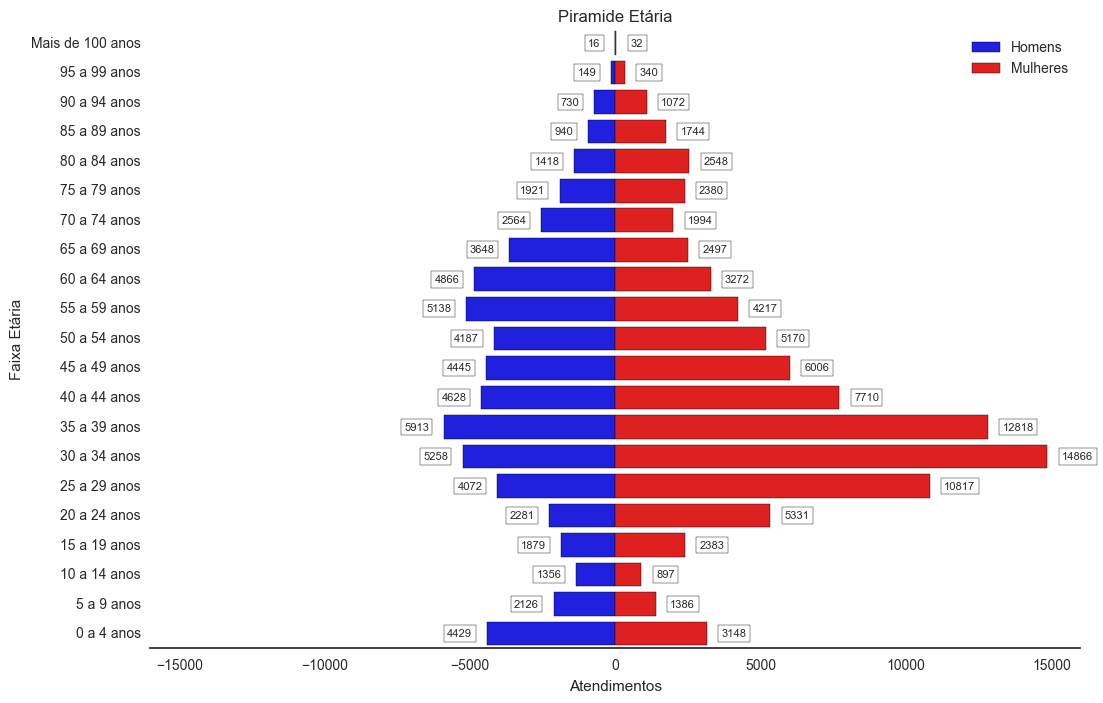

In [184]:
sns.set_style("white")

fig = plt.figure(figsize=(12,8))
plt.xlim(-16000, 16000)


bar_plot1 = sns.barplot(x="MASCULINO",y="FAIXA_ETARIA", 
                       order=['Mais de 100 anos','95 a 99 anos','90 a 94 anos','85 a 89 anos','80 a 84 anos','75 a 79 anos','70 a 74 anos','65 a 69 anos','60 a 64 anos','55 a 59 anos','50 a 54 anos','45 a 49 anos','40 a 44 anos','35 a 39 anos','30 a 34 anos','25 a 29 anos','20 a 24 anos','15 a 19 anos','10 a 14 anos','5 a 9 anos','0 a 4 anos'],
                       orient = 'h',color="blue", label="Homens",data = piramide_etaria)

for p in bar_plot1.axes.patches:
    b=p.get_bbox()
    bar_plot1.axes.annotate("{:.0f}".format(-b.x0), (-p.get_width() - 500, p.get_y() + 0.4), size=8, 
                                va='center', ha='right', bbox=dict(boxstyle='square', fc = 'w')) 

plt.legend(loc='upper left')

bar_plot2 = sns.barplot(x="FEMININO",y="FAIXA_ETARIA", 
                       order=['Mais de 100 anos','95 a 99 anos','90 a 94 anos','85 a 89 anos','80 a 84 anos','75 a 79 anos','70 a 74 anos','65 a 69 anos','60 a 64 anos','55 a 59 anos','50 a 54 anos','45 a 49 anos','40 a 44 anos','35 a 39 anos','30 a 34 anos','25 a 29 anos','20 a 24 anos','15 a 19 anos','10 a 14 anos','5 a 9 anos','0 a 4 anos'],
                       orient = 'h', color="red", label="Mulheres",data = piramide_etaria) 
for p in bar_plot2.axes.patches:
    b=p.get_bbox()
    if b.x1 > 0:
        bar_plot2.axes.annotate("{:.0f}".format(b.x1), (p.get_x() + p.get_width() + 500, p.get_y() + 0.4), size=8, 
                                va='center', ha='left', bbox=dict(boxstyle='square', fc = 'w')) 
plt.legend(loc='best')   

# Ocultar eixo x      
#bar_plot1.axes.get_xaxis().set_visible(False)
#bar_plot2.axes.get_xaxis().set_visible(False)



#bar_plot2.set(xlabel="Atendimentos", ylabel="Faixa Etária", title = "Piramide Etária")

bar_plot1.set(xlabel="Atendimentos", ylabel="Faixa Etária", title = "Piramide Etária")
sns.despine(left=True)
plt.show()

Através do gráfico acima podemos observar que é na população feminina entre 30 e 39 anos que registra-se o maior volume de atendimentos. Considerando toda população em estudo podemos concluir que as mulheres são as que mais utilizam plano o de saúde.

### Perfil Epidemiológico

Com base na Classificação Internacional de Doenças vamos avaliar a distribuição de atendimentos por classificação de doenças para identificar-mos quais as principais doenças dos beneficiários de plano de saude da Bahia.

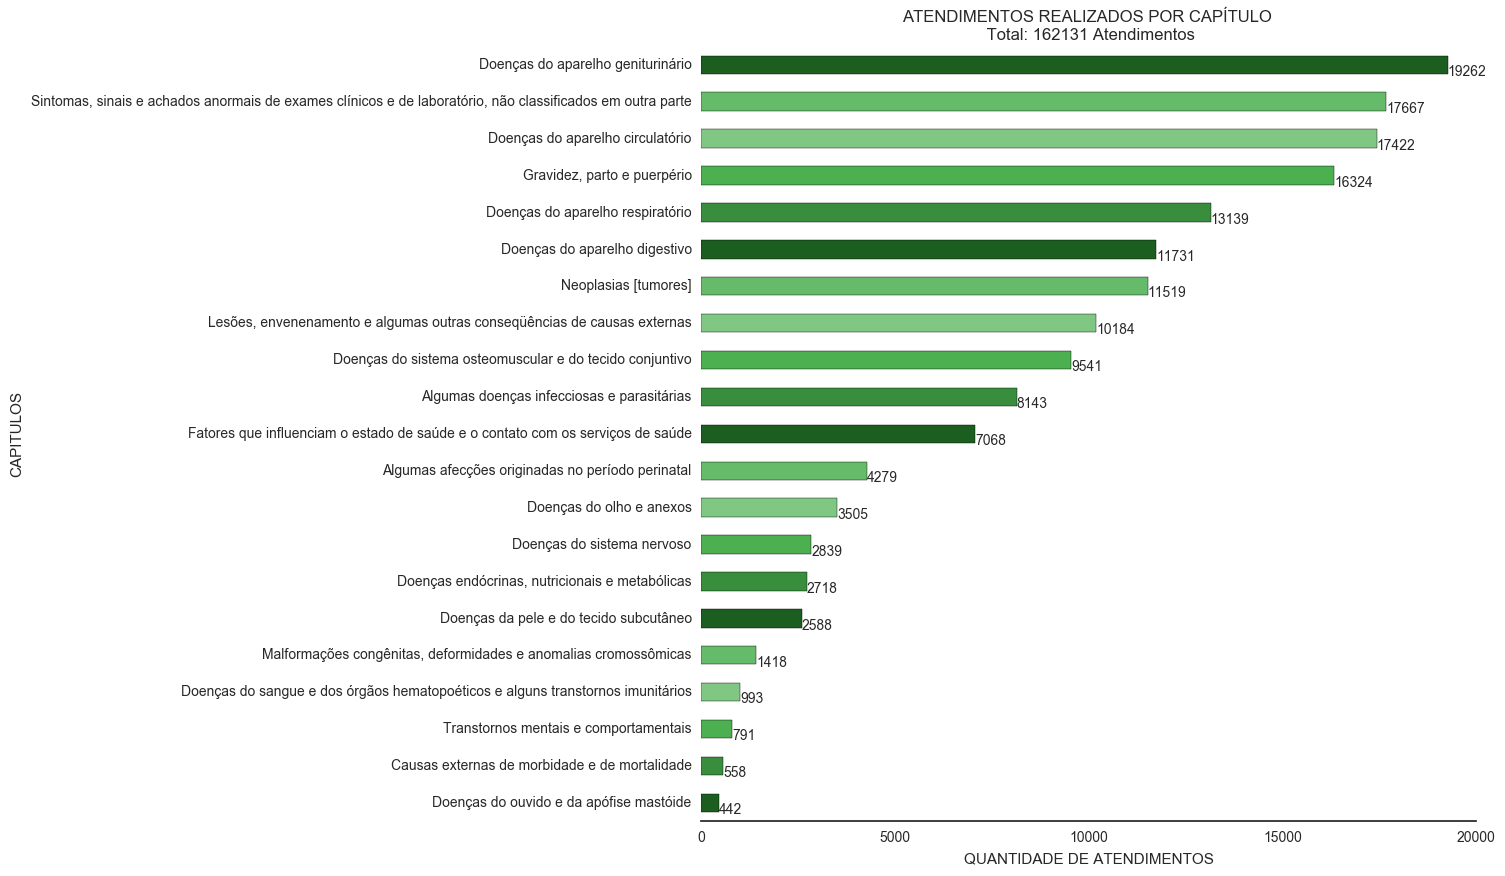

In [79]:
# Grafico - Volume de atendimentos por capitulo
ax = d_tiss_tratado.groupby('CID_CAPITULO')['ID_EVENTO'].count().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
    
plt.title('ATENDIMENTOS REALIZADOS POR CAPÍTULO \n Total: ' + str(d_tiss_tratado['ID_EVENTO'].count()) + ' Atendimentos')
plt.ylabel('CAPITULOS')
plt.xlabel('QUANTIDADE DE ATENDIMENTOS', )
plt.show()

Através do gráfico acima podemos perceber que os três principais Capítulos são: Doenças do aparelho geniturinário é o Capítulo que possui maior incidência diagnóstica na população, em seguida vem Sintomas, sinais e achados anormais de exames clínicos e de laboratório, não classificados em outra parte e depois doenças do aparelho circulatório. 


####                       Sintomas, sinais e achados anormais de exames clínicos e de laboratório, não classificados em outra parte

Sinais e sintomas que conduzam de forma razoavelmente precisa a um dado diagnóstico estão classificados em categorias de outros capítulos desta classificação. De modo geral, as categorias deste capítulo incluem aqueles sintomas e afecções menos bem definidas que, sem que tenha havido o necessário estudo do caso para se estabelecer um diagnóstico final, podem conduzir com igual possibilidade a duas ou mais doenças diferentes ou a dois ou mais aparelhos do corpo. Praticamente todas as categorias deste capítulo se poderiam designar como “não especificado de outra forma”, “etiologia desconhecida” ou “transitório”. O Índice Alfabético deve ser consultado para se determinar quais sintomas e sinais devem ser alocados aqui e quais a outros capítulos. As subcategorias residuais .8 são fornecidas para outros sintomas relevantes que não possam ser classificados em outras partes da classificação.
As afecções e sinais ou sintomas incluídos nas categorias R00-R99 consistem de: a) casos para os quais não se possa chegar a um diagnóstico mais preciso, mesmo depois que todos os fatos que digam respeito ao caso tenham sido investigados; b) sinais ou sintomas existentes no momento da primeira consulta que se mostrem de caráter transitório e cujas causas não possam ser determinadas; c) diagnósticos provisórios atribuídos a um paciente que não retorne a consulta para aprofundamento da investigação do diagnóstico ou para assistência; d) casos encaminhados a outros locais para investigação ou tratamento antes que o diagnóstico fosse feito; e) casos para os quais não foi possível estabelecer um diagnóstico mais preciso por qualquer outra razão; f) alguns sintomas para os quais se fornece informação complementar e que representam por si só importantes problemas na assistência médica.

Fonte: http://www.datasus.gov.br/cid10/V2008/WebHelp/r00_r99.htm

#### Conforme consta na definição acima as categorias deste capítulo incluem diagnósticos menos precisos, de carater provisório ou trasitórios, etc. Por isso irei deixa-lo de fora das demais análises que demonstrarei sobre o perfil epidemiológico.

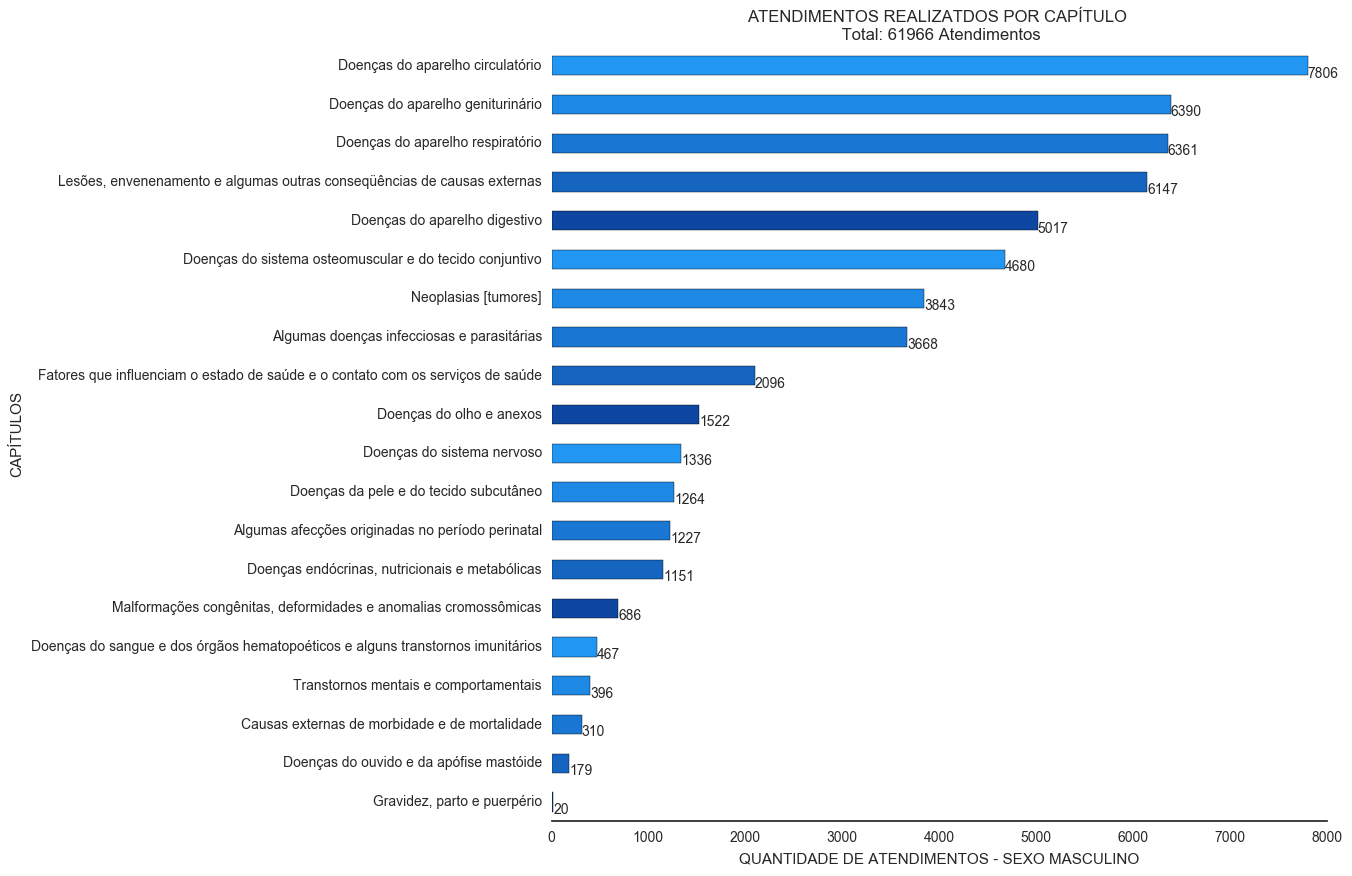

In [80]:
#  Grafico - Volume de atendimentos por capitulo - Sexo masculino, excuindo-se o capítulo XVIII
ax = d_tiss_tratado[(d_tiss_tratado.CD_SEXO == 1) & (d_tiss_tratado.CID_NUMCAP != 18)].groupby('CID_CAPITULO')['ID_EVENTO'].count().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
    
plt.title('ATENDIMENTOS REALIZATDOS POR CAPÍTULO \n Total: ' + str(d_tiss_tratado[(d_tiss_tratado.CD_SEXO == 1)]['ID_EVENTO'].count()) + ' Atendimentos')
plt.ylabel('CAPÍTULOS')
plt.xlabel('QUANTIDADE DE ATENDIMENTOS - SEXO MASCULINO', )
plt.show()

Quando olhamos separadamente por sexo, as três principais classificações de doenças que mais ocorrem para os homens são:  Doenças do aparelho circulatório, Doenças do aparelho geniturinário e Doenças do aparelho respiratório.

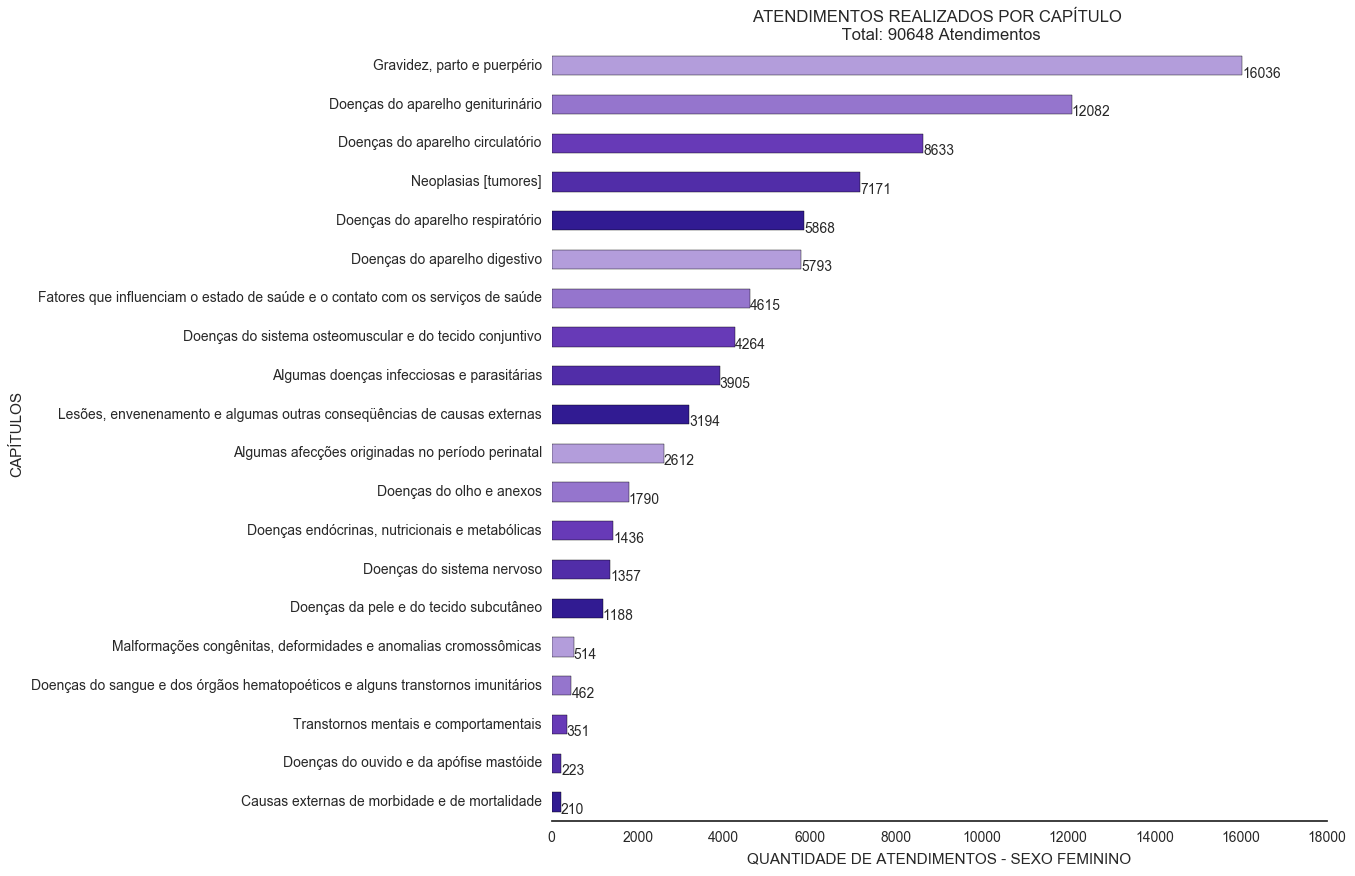

In [129]:
#  Grafico - Volume de atendimentos por capitulo - Sexo feminino, excuindo-se o capítulo XVIII
ax = d_tiss_tratado[(d_tiss_tratado.CD_SEXO == 3) & (d_tiss_tratado.CID_NUMCAP != 18)].groupby('CID_CAPITULO')['ID_EVENTO'].count().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
    
plt.title('ATENDIMENTOS REALIZADOS POR CAPÍTULO \n Total: ' + str(d_tiss_tratado[(d_tiss_tratado.CD_SEXO == 3)]['ID_EVENTO'].count()) + ' Atendimentos')
plt.ylabel('CAPÍTULOS')
plt.xlabel('QUANTIDADE DE ATENDIMENTOS - SEXO FEMININO', )
plt.show()

Já para as mulheres temos Gravidez, parto e puerpério, em seguida vem as Doenças do aparelho geniturinário e depois Doenças do aparelho circulatório.

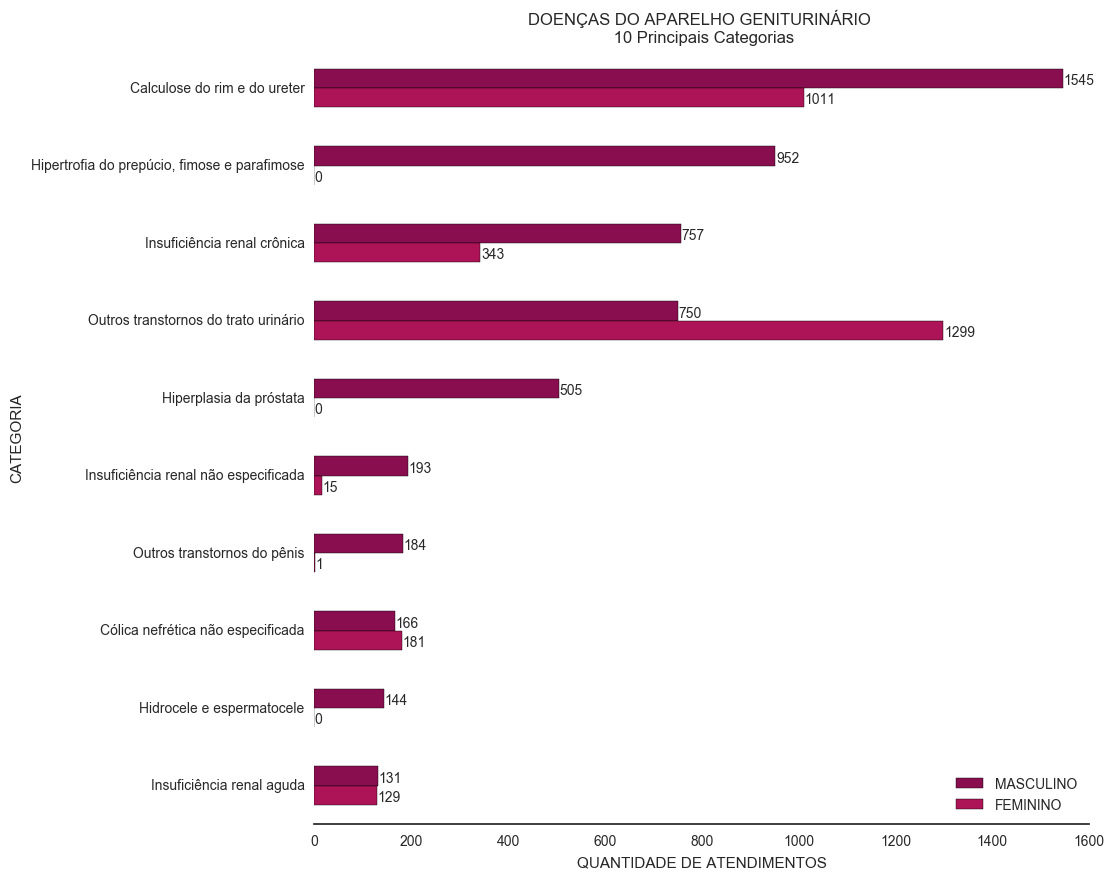

In [130]:
# As 10 principais Categorias de Doenças do aparelho geniturinário
ax = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP == 14)].groupby('CID_CATEGORIA')['MASCULINO','FEMININO'].sum().sort_values(by=['MASCULINO','FEMININO'], ascending=False).iloc[:10].plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
ax.invert_yaxis()

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.2))
    
plt.title('DOENÇAS DO APARELHO GENITURINÁRIO \n 10 Principais Categorias')
plt.ylabel('CATEGORIA')
plt.xlabel('QUANTIDADE DE ATENDIMENTOS', )
plt.show()

Já na classificação Doenças do aparelho genituário a Calculose do rim e do ureter se destaca como a categoria de doença mais frequente, sendo que dentre os casos diagnosticados, 59% ocorreram em Homens e 41% em Mulheres.

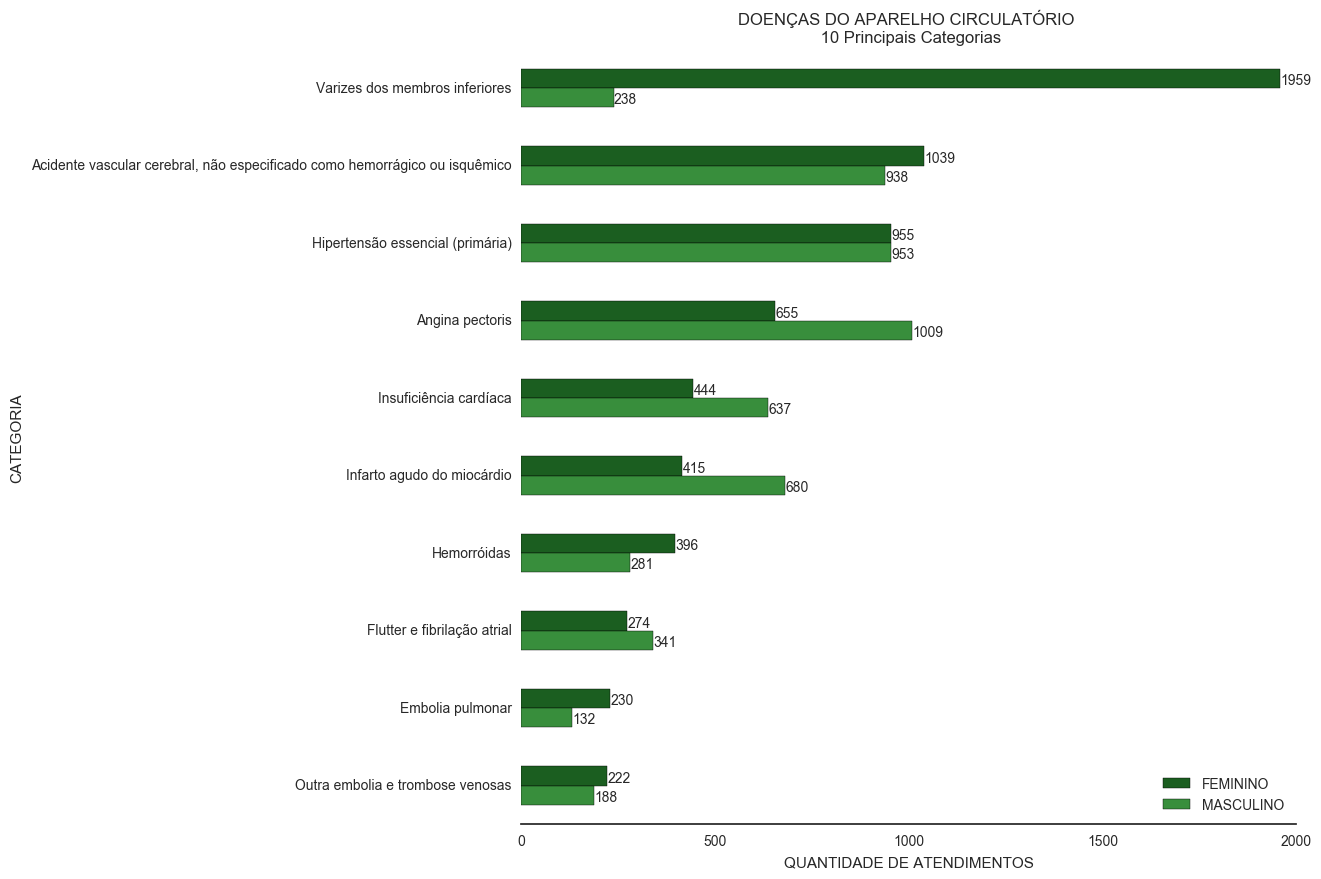

In [82]:
# As 10 principais Cateorias de Doenças do aparelho circulatório
ax = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP == 9)].groupby('CID_CATEGORIA')['FEMININO','MASCULINO'].sum().sort_values(by=['FEMININO','MASCULINO'], ascending=False).iloc[:10].plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
ax.invert_yaxis()

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.2))
    
plt.title('DOENÇAS DO APARELHO CIRCULATÓRIO \n 10 Principais Categorias')
plt.ylabel('CATEGORIA')
plt.xlabel('QUANTIDADE DE ATENDIMENTOS', )
plt.show()

Na classificação Doenças do aparelho circulatório, as doenças relacionadas a varizes dos membros inferiores é a categoria mais frequente na população de beneficiários de planos de saúde do estado da Bahia, sendo que dentre os casos diagnosticados, 87% ocorreram em Mulheres e 13% em Homens.

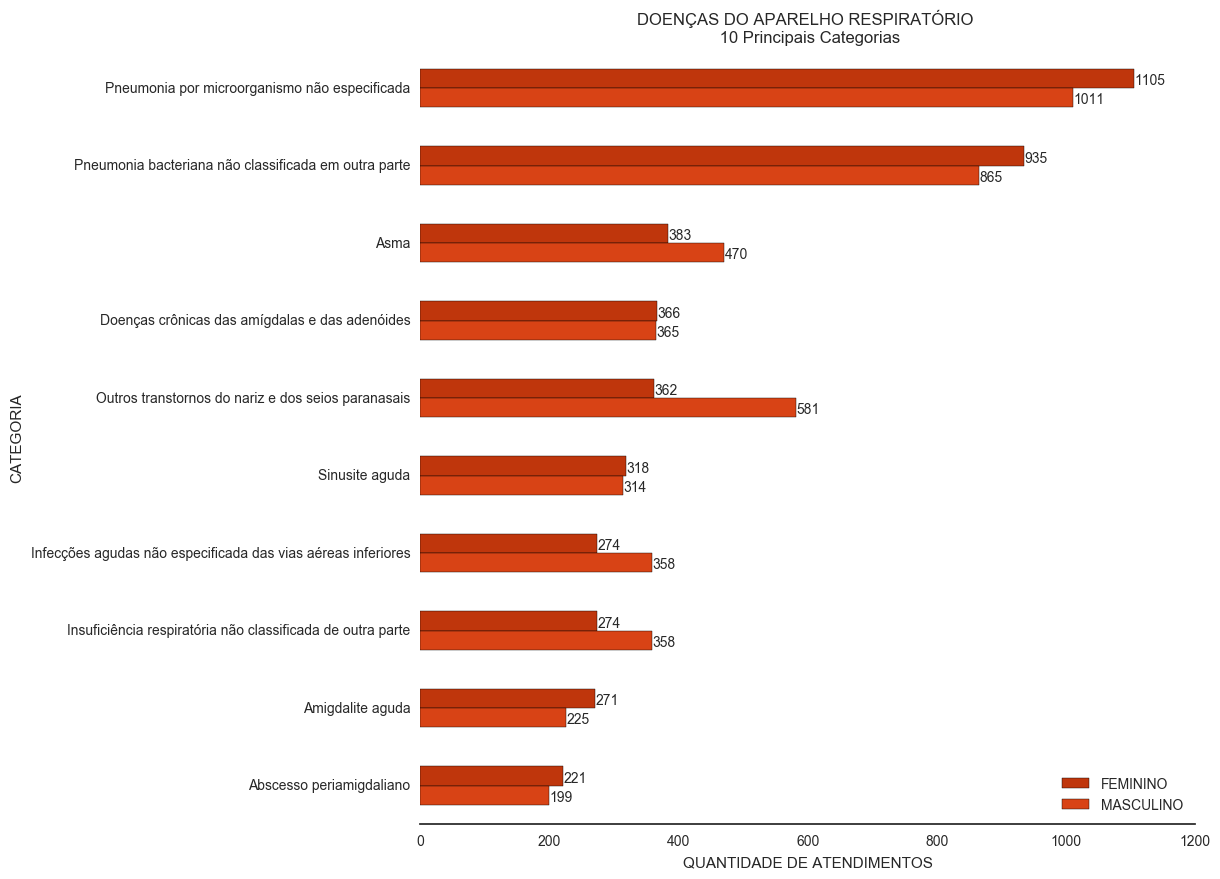

In [85]:
# As 10 principais Cateorias de Doenças do aparelho respiratório
ax = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP == 10)].groupby('CID_CATEGORIA')['FEMININO','MASCULINO'].sum().sort_values(by=['FEMININO','MASCULINO'], ascending=False).iloc[:10].plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
ax.invert_yaxis()

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.2))
    
plt.title('DOENÇAS DO APARELHO RESPIRATÓRIO \n 10 Principais Categorias')
plt.ylabel('CATEGORIA')
plt.xlabel('QUANTIDADE DE ATENDIMENTOS', )
plt.show()

Em Doenças do aparelho respiratório a Pneumonia por microrganismo não especificada é a categoria de doença mais frequente,  sendo que dentre os casos diagnosticados, 52% ocorreram em Mulheres e 48% em Homens. 

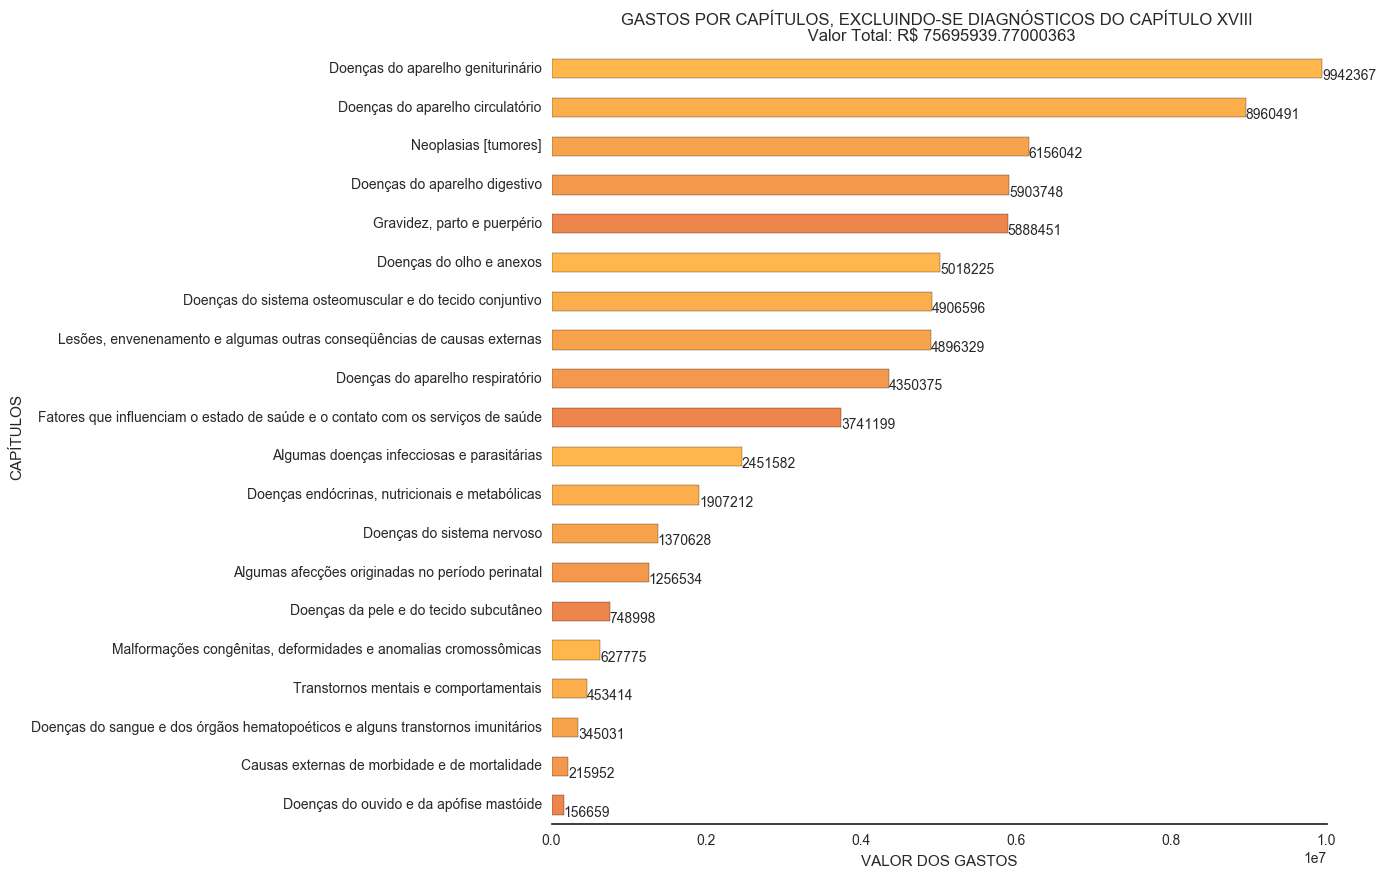

In [132]:
# Grafico Volume de gastos por Capítulo, excuindo-se o capítulo XVIII
sexo_procedimentos = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP != 18)].groupby('CID_CAPITULO')['VALOR_PROCEDIMENTO'].sum().sort_values().plot(kind='barh', figsize=(10,10), color=random.choice(colors), alpha=.7)
sns.despine(left=True)
for p in sexo_procedimentos.patches:
    b=p.get_bbox()
    sexo_procedimentos.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.xticks(rotation=0)
plt.xlabel('VALOR DOS GASTOS')
plt.ylabel('CAPÍTULOS')
plt.title('GASTOS POR CAPÍTULOS, EXCLUINDO-SE DIAGNÓSTICOS DO CAPÍTULO XVIII \n Valor Total: R$ ' + str(d_tiss_tratado['VALOR_PROCEDIMENTO'].sum()))
plt.show()

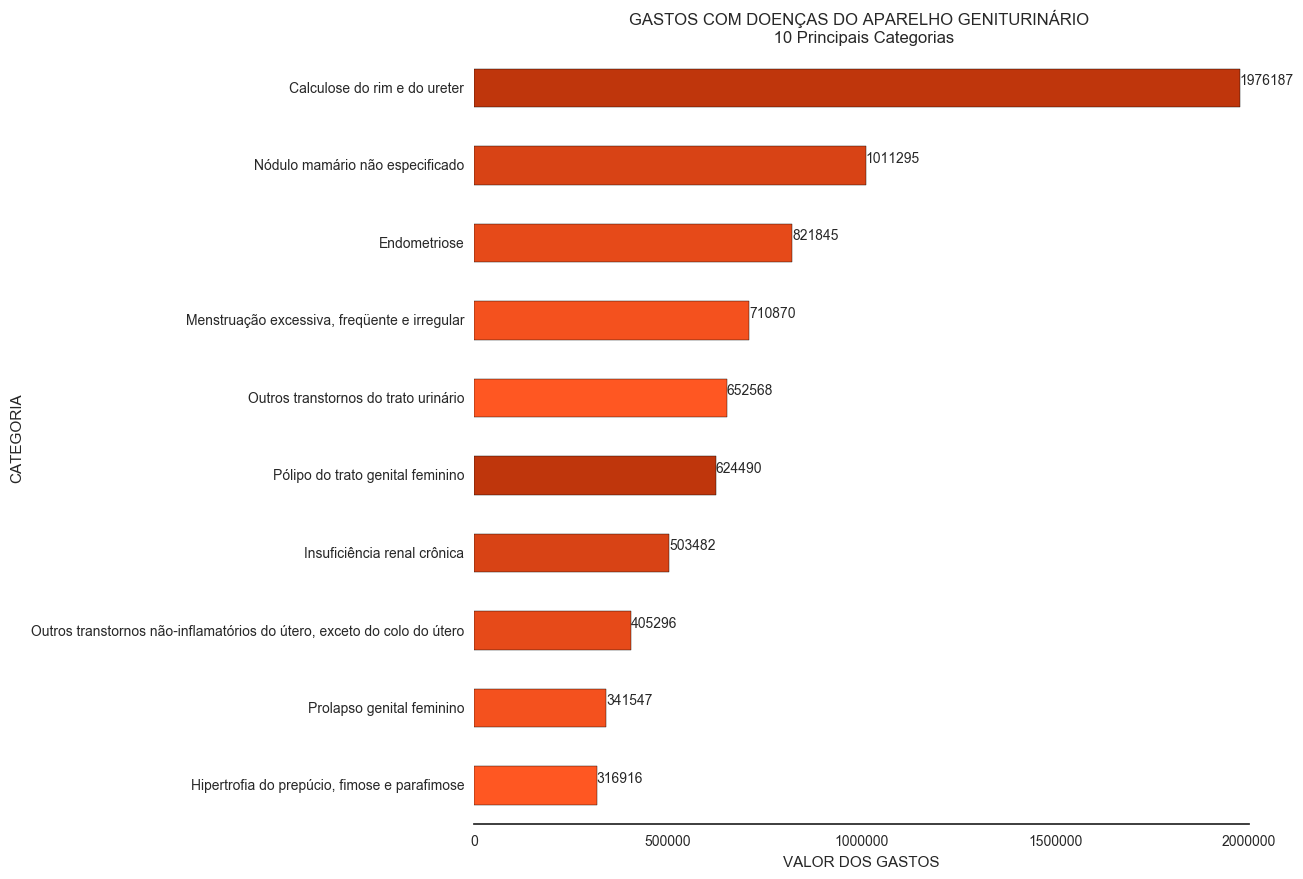

In [134]:
# Gastos com as 10 principais Categorias de Doenças do aparelho circulatório
ax = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP == 14)].groupby('CID_CATEGORIA')['VALOR_PROCEDIMENTO'].sum().sort_values(ascending=False).iloc[:10].plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
ax.invert_yaxis()

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.2))
    
plt.title('GASTOS COM DOENÇAS DO APARELHO GENITURINÁRIO \n 10 Principais Categorias')
plt.ylabel('CATEGORIA')
plt.xlabel('VALOR DOS GASTOS', )
plt.show()

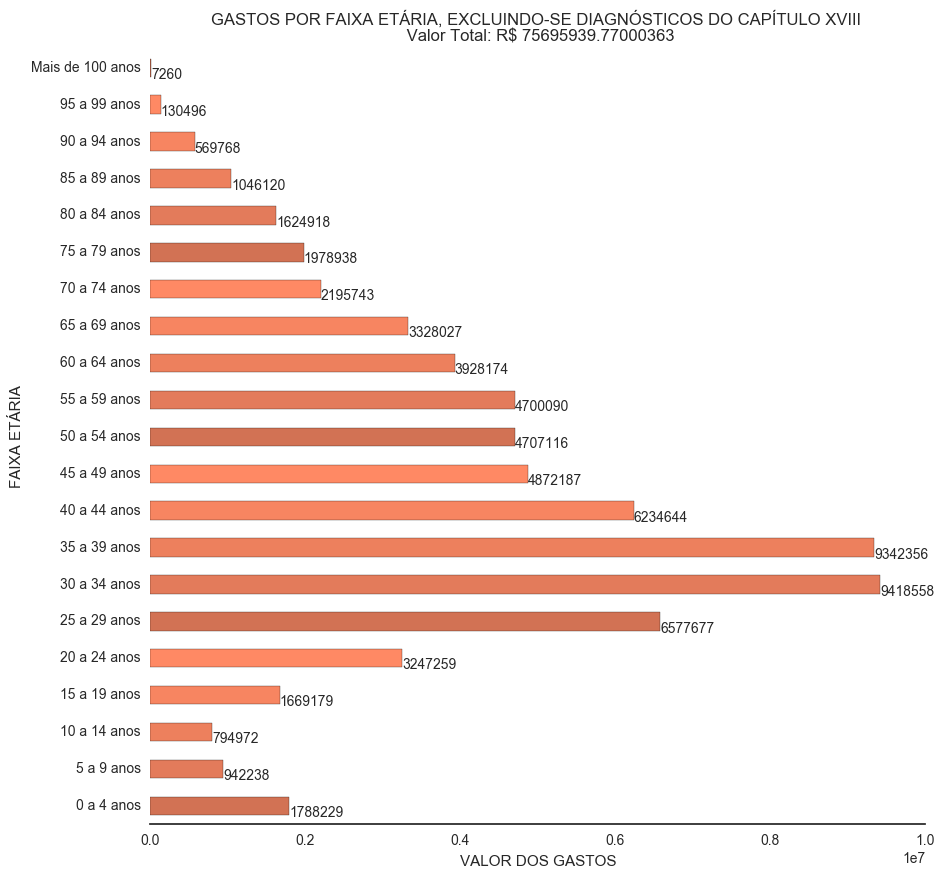

In [88]:
# Grafico Volume de gastos por Faixa Etária, excuindo-se o capítulo XVIII
sexo_procedimentos = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP != 18)].groupby('FAIXA_ETARIA')['VALOR_PROCEDIMENTO'].sum().plot(kind='barh', figsize=(10,10), color=random.choice(colors), alpha=.7)
sns.despine(left=True)
for p in sexo_procedimentos.patches:
    b=p.get_bbox()
    sexo_procedimentos.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.xticks(rotation=0)
plt.xlabel('VALOR DOS GASTOS')
plt.ylabel('FAIXA ETÁRIA')
plt.title('GASTOS POR FAIXA ETÁRIA, EXCLUINDO-SE DIAGNÓSTICOS DO CAPÍTULO XVIII \n Valor Total: R$ ' + str(d_tiss_tratado['VALOR_PROCEDIMENTO'].sum()))
plt.show()

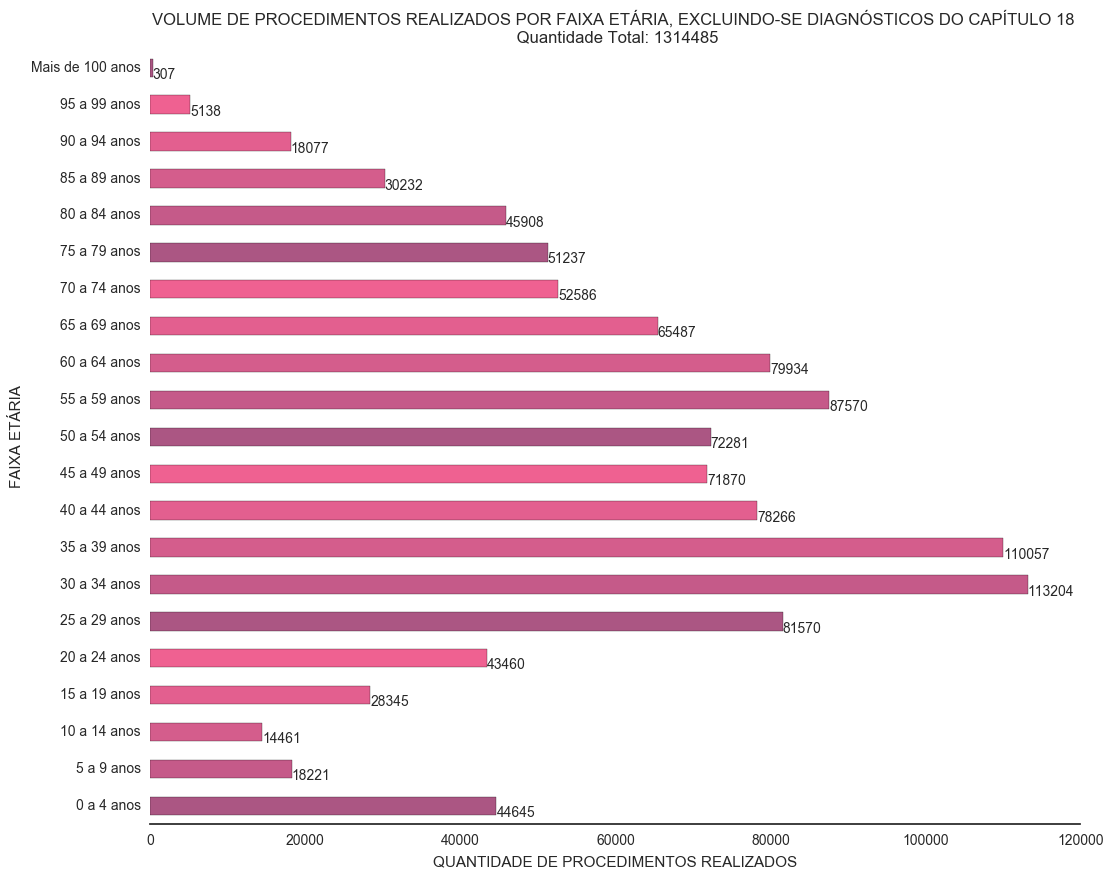

In [89]:
# Grafico - Volume de procedimentos realizados por faixa etária, excuindo-se o capítulo XVIII
sexo_procedimentos = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP != 18)].groupby('FAIXA_ETARIA')['QTD_PROCEDIMENTO'].sum().plot(kind='barh', figsize=(12,10), color=random.choice(colors), alpha=.7)
sns.despine(left=True)
for p in sexo_procedimentos.patches:
    b=p.get_bbox()
    sexo_procedimentos.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
    #sexo_procedimentos.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 olu+ b.x1)/2 - 0.05, b.y1 + 15),size=6)

plt.xticks(rotation=0)
plt.xlabel('QUANTIDADE DE PROCEDIMENTOS REALIZADOS')
plt.ylabel('FAIXA ETÁRIA')
plt.title('VOLUME DE PROCEDIMENTOS REALIZADOS POR FAIXA ETÁRIA, EXCLUINDO-SE DIAGNÓSTICOS DO CAPÍTULO 18 \n Quantidade Total: ' + str(d_tiss_tratado['QTD_PROCEDIMENTO'].sum()))
plt.show()

Respondendo a mais uma das perguntas propostas para esta análise, percebemos que o maior volume de gastos concentram-se na população com a faixa etária entre 30 a 39 anos, é nesta faixa etária também que ocorre o maior volume de procedimentos realizados. Com base nesta informação verificaremos quais agrupamento de doenças ocorrem nesta faixa etária.

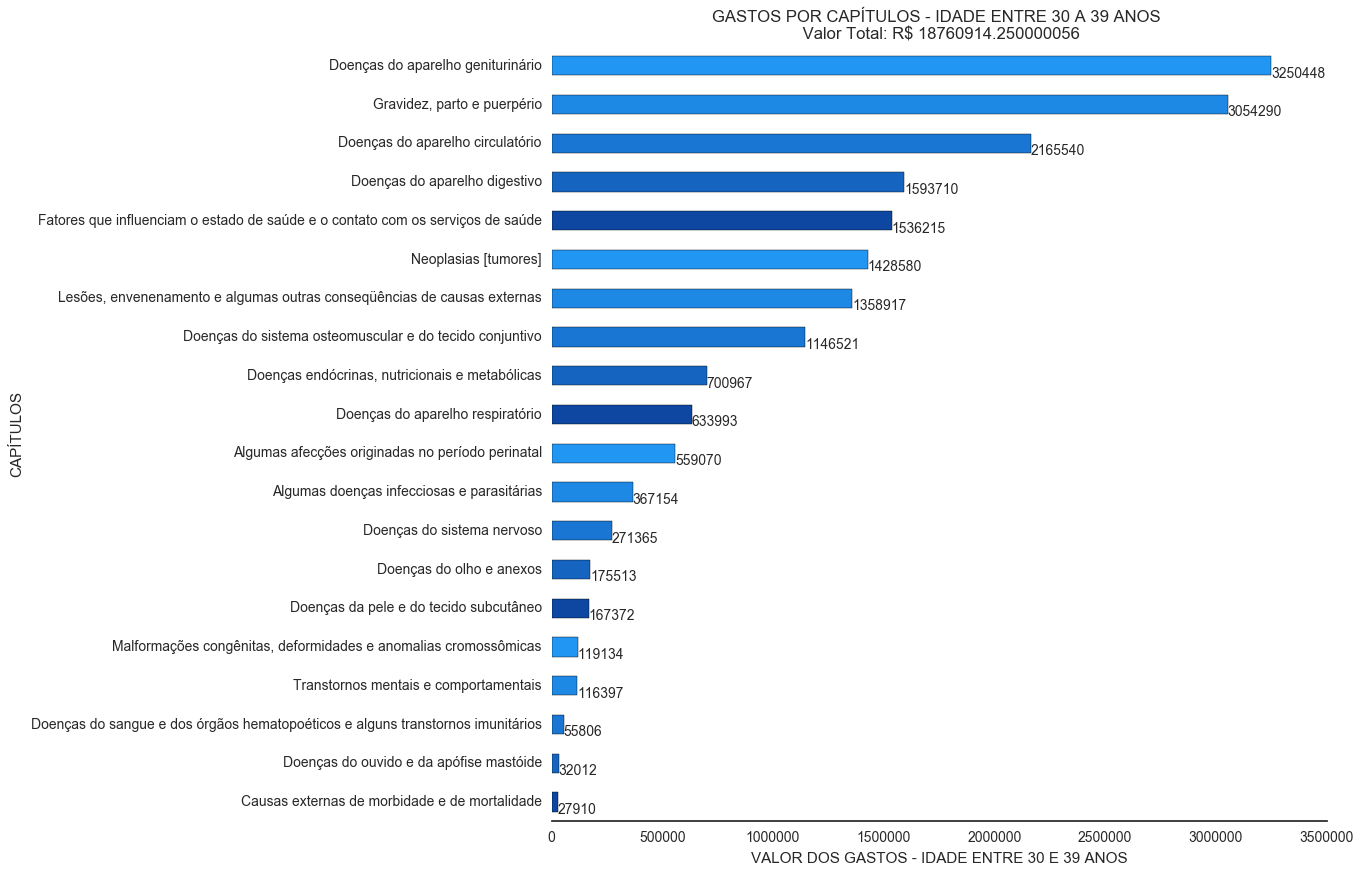

In [90]:
#  Grafico - Volume de gastos por capitulo - Idade entre 30 e 39 anos
ax = d_tiss_tratado[(d_tiss_tratado.IDADE_BENEFICIARIO >= 30) & (d_tiss_tratado.IDADE_BENEFICIARIO <= 39) & (d_tiss_tratado.CID_NUMCAP != 18)].groupby('CID_CAPITULO')['VALOR_PROCEDIMENTO'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(10,10))
sns.despine(left=True)
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))
    
plt.title('GASTOS POR CAPÍTULOS - IDADE ENTRE 30 A 39 ANOS \n Valor Total: R$ ' + str(d_tiss_tratado[(d_tiss_tratado.IDADE_BENEFICIARIO >= 30) & (d_tiss_tratado.IDADE_BENEFICIARIO <= 39) & (d_tiss_tratado.CID_NUMCAP != 18)]['VALOR_PROCEDIMENTO'].sum()))
plt.ylabel('CAPÍTULOS')
plt.xlabel('VALOR DOS GASTOS - IDADE ENTRE 30 E 39 ANOS', )
plt.show()

## Crindo um modelo de Series Temporais para prever gastos com Donças do aparelho geniturinário para primeiro trimestre de 2017

Levando em consideração a classificação por capítulo onde ocorreram o maior volume de diagnósticos e representando também a classificação com maior volume de gastos, irei criar um modelo de Séries Temporais para prever os gastos com Doenças do aparelho geniturinário. Começarei criando um novo dataset específico para criação do modelo, depois desenvolverei uma bateria de testes para investigar os dados e avaliar os modelos candidatos e por ultimo realizarei as previsões.

In [109]:
# Criando um dataset para Análise das Series Temporais
d_tiss_modelo = d_tiss_tratado[(d_tiss_tratado.CID_NUMCAP == 14)].groupby('COMPETENCIA_EVENTO')['VALOR_PROCEDIMENTO'].sum().reset_index()
d_tiss_modelo['COMPETENCIA_EVENTO'] = [datetime.strptime(row.astype(str), '%Y%m').strftime('%m/%Y') for row in d_tiss_modelo['COMPETENCIA_EVENTO']]
d_tiss_modelo['DATA'] = '01/'+d_tiss_modelo['COMPETENCIA_EVENTO'].astype(str)
d_tiss_modelo['DATA'] = pd.to_datetime(pd.Series(d_tiss_modelo['DATA']), format="%d/%m/%Y")
d_tiss_modelo.set_index('COMPETENCIA_EVENTO', inplace=True)

d_tiss_modelo.index = pd.PeriodIndex(d_tiss_modelo.DATA, freq='M')
d_tiss_modelo = d_tiss_modelo.sort_values(by = "DATA")

In [ ]:
d_tiss_modelo.dtypes 

In [ ]:
d_tiss_modelo.head()

O conjunto de dados é limitado, composto apenas de 18 observações, por isso não poderei abrir mão de uma parte dele para criar uma base de validação, utilizarei todo o conjunto de dados para criar o modelo de Séries temporais.

In [ ]:
# Salvando dataset modelo
d_tiss_modelo.to_csv('d_tiss_modelo.csv')

## Avaliação do Modelo

O desenpenho das previsões serão avaliados através do erro quadrático médio (RMSE), isso dará mais peso as previsões com erros mais discrepantes e terão as mesmas unidades que os dados originais. Utilizarei o mean_squared_error() da dabiblioteca scikit-learn para calcular o erro médio quadrático entre uma lista de valores esperados (conjunto de testes) e a lista de previsões e daí então pegar a raiz quadrada desse valor para calcular o score RMSE.

O primeiro passo é estabelecer uma medida de desempenho, isso servirá de modelo para posteriormente ser comprado com outros modelos mais elaborados. Uma 'baseline' para a previsão de séries temporais bem simples seria prever um passo a frente com base na observação anterior. 

#####  Procedimentos de teste
Os modelos candidatos serão avaliados usando validação walk-forward. Considerando o tamanho da séries disponível, será viável criar um modelo que seja re-treinado com todos os dados disponíveis antes de cada previsão.

A validação walk-forward funcionará da seguinte forma:

Os primeiros 50% do conjunto de dados serão retidos para treinar o modelo.
Os 50% restantes do conjunto de dados serão iterados e testarão o modelo.
Para cada etapa do conjunto de dados de teste:
Um modelo será treinado.
Uma previsão de um passo feita e a previsão armazenada para avaliação posterior.
A observação real do conjunto de dados de teste será adicionada ao conjunto de dados de treinamento para a próxima iteração.
As previsões feitas durante a iteração do conjunto de dados de teste serão avaliadas e uma pontuação RMSE relatada.

>Predicted=539088.250, Expected=546354
>Predicted=546354.312, Expected=585598
>Predicted=585597.500, Expected=537464
>Predicted=537463.688, Expected=596783
>Predicted=596782.625, Expected=545774
>Predicted=545774.000, Expected=626770
>Predicted=626770.188, Expected=723624
>Predicted=723624.188, Expected=697669
>Predicted=697668.625, Expected=535729
RMSE: 76644.529


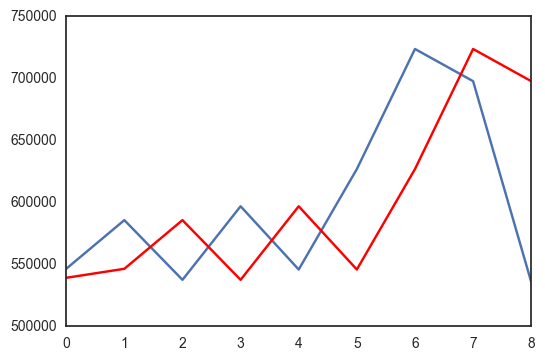

In [149]:
# preparação dos dados
X = d_tiss_modelo.VALOR_PROCEDIMENTO.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# validação walk-forward
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # Previsões
    yhat = history[-1]
    predictions.append(yhat)
    # Observações
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# RMSE 
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

# Plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Analise dos dados

In [ ]:
d_tiss_modelo.describe().astype('Int64')

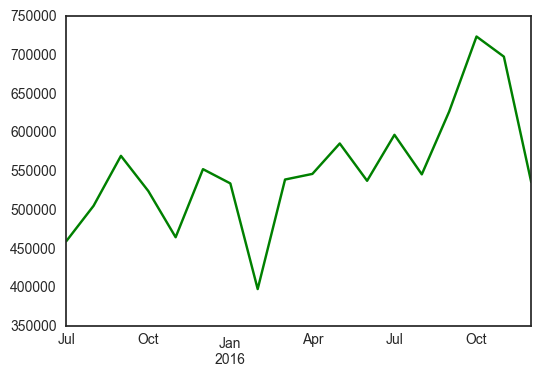

In [136]:
# Gastos com procedimentos - doenças do aparelho geniturinário
d_tiss_modelo.VALOR_PROCEDIMENTO.plot(color='green')

Como eu já havia comentado anteriormente a série disponível é muito pequena para uma análise mais criteriosa, aparentemente é uma série estacionária, alguns movimentos sugerindo sazonalidade, porém devido ao volume de informações ser muito pequeno não da para identificar algum tipo de tendência. 

### Decomposição

Nessa abordagem, tanto a tendência como a sazonalidade são modeladas separadamente e a parte restante da série é retornada.

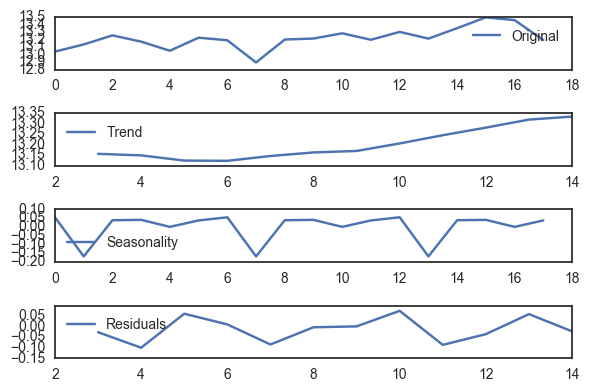

In [143]:
# Aplicando transformação logarítmica
ts_log = np.log(d_tiss_modelo.VALOR_PROCEDIMENTO.values) 

# Realizando a decomposição
decomposition = seasonal_decompose(ts_log, freq=6) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = np.array(decomposition.resid) 
plt.subplot(411) 
plt.plot(ts_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout()

Aqui podemos ver que a tendência, a sazonalidade são separadas dos dados e podemos modelar os resíduos, permitindo verificar a estacionariedade dos resíduos.

### Teste Dickey-Fuller aumentado

Os testes estatísticos fazem grandes pressupostos sobre seus dados. Eles só podem ser usados para informar o grau em que uma hipótese nula pode ser aceita ou rejeitada. O resultado deve ser interpretado para que um determinado problema seja significativo.

No entanto, eles podem fornecer uma verificação rápida e provas confirmativas de que suas séries temporais são estacionárias ou não estacionárias.

O teste Augmented Dickey-Fuller é um tipo de teste estatístico chamado teste de raiz unitária .

A intuição por trás de um teste de raiz unitária é que ele determina o quão fortemente uma série de tempo é definida por uma tendência.

Há uma série de testes de raiz unitária e o Augmented Dickey-Fuller pode ser um dos mais amplamente utilizados. Ele usa um modelo autoregressivo e otimiza um critério de informação em vários valores de atraso diferentes.

A hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (possui uma estrutura dependente do tempo). A hipótese alternativa (rejeitando a hipótese nula) é que as séries temporais são estacionárias.

- Hipótese nula (H0) : se aceita, sugere que a série temporal possui uma raiz unitária, o que significa que não é estacionário. Tem alguma estrutura dependente do tempo.
- Hipótese Alternativa (H1) : a hipótese nula é rejeitada; ele sugere que a série temporal não possui uma unidade de raiz, o que significa que esta é estacionária. Não possui estrutura dependente do tempo.
Interpretamos esse resultado usando o valor p do teste. Um valor p abaixo de um limite (como 5% ou 1%) sugere que rejeitamos a hipótese nula (estacionária), caso contrário, um valor p acima do limite sugere que aceitamos a hipótese nula (não estacionária).

* p-value  >   0.05 : Aceita a hipótese nula (H0), os dados têm uma raiz da unidade e não são estacionários.
* p-value <= 0.05 : Rejeitar a hipótese nula (H0), os dados não possuem uma raiz da unidade e estão estacionários

Fonte: https://machinelearningmastery.com/time-series-data-stationary-python/

In [137]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=6).mean()
    rolstd = pd.Series.rolling(timeseries, window=6).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

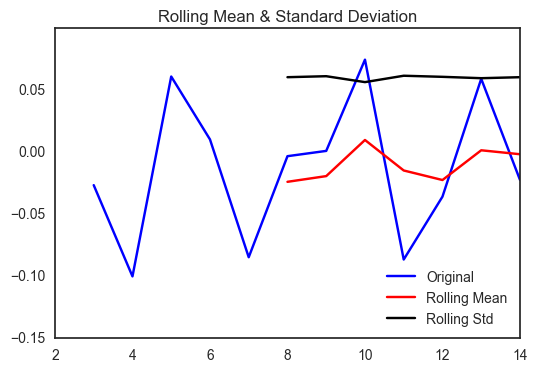

Results of Dickey-Fuller Test:
Test Statistic                -5.888691e+00
p-value                        2.959529e-07
#Lags Used                     1.000000e+00
Number of Observations Used    1.000000e+01
Critical Value (10%)          -2.748700e+00
Critical Value (5%)           -3.232950e+00
Critical Value (1%)           -4.331573e+00
dtype: float64


In [138]:
ts_log_decompose = pd.Series(residual)
ts_log_decompose.dropna(inplace = True)
test_stationarity (ts_log_decompose)

A estatística de teste Dickey-Fuller é menor do que todos os valores críticos, isto siguinifica que podemos rejeitar a hipótese nula com um nível de significância inferior a 1% (ou seja, uma baixa probabilidade de que o resultado seja um risco estatístico), portanto, essa série temporal é muito próxima a estacionária.

## Modelo ARIMA

ARIMA significa médias móveis auto-regressivas, os preditores dependem dos parâmetros (p, d, q) do modelo ARIMA:

1. Número de termos AR (Auto-Regressivo) (p): os termos AR são apenas atrasos da variável dependente. Por exemplo, se p é 5, os preditores de x (t) serão x (t-1) ... .x (t-5).
2. Número de termos MA (Média Movel) (q): os termos MA são erros de previsão atrasados na equação de predição. Por exemplo, se q for 5, os preditores para x (t) serão e (t-1) ... .e (t-5) onde e (i) é a diferença entre a média móvel no iº instante e o valor real.
3. Número de diferenças (d): são o número de diferenças não-sazonais, ou seja, neste caso, tomamos a primeira diferença de ordem. Então, podemos passar essa variável e colocar d = 0 ou passar a variável original e colocar d = 1. Ambos gerarão os mesmos resultados.

Função de autocorrelação (ACF): é uma medida da correlação entre o TS com uma versão atrasada de si. Por exemplo, no intervalo 5, ACF compara séries no instante instantâneo 't1' ... 't2' com séries no instante 't1-5' ... 't2-5' (t1-5 e t2 sendo pontos finais).
Função de Autocorrelação Parcial (PACF): Isso mede a correlação entre o TS com uma versão atrasada de si, mas depois de eliminar as variações já explicadas pelas comparações intermediárias. Por exemplo, no intervalo 5, verificará a correlação, mas removerá os efeitos já explicados pelos atrasos 1 a 4.

Fonte: https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/

Irei abordar a modelagem por configuração automática do modelo ARIMA. Isto será seguido por uma segunda etapa para investigar os erros residuais do modelo escolhido.

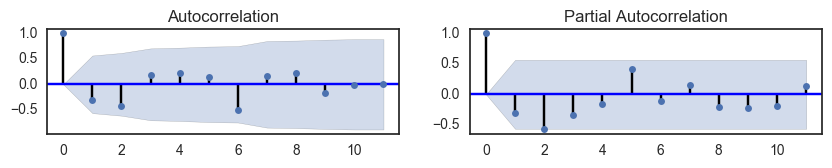

In [115]:
plt.figure(1)
plt.subplots(1, 2, figsize=(10,3))
plt.subplot(221)
plot_acf(ts_log_decompose, ax=plt.gca())
plt.subplot(222)
plot_pacf(ts_log_decompose, ax=plt.gca())
plt.show()

* O ACF mostra um atraso significativo por 1 mês.
* O PACF mostra também um atraso significativo durante 1 mês.

Tanto o ACF como o PACF mostram uma queda no mesmo ponto, sugerindo uma mistura de AR e MA.
Um bom ponto de partida para os valores p e q também é 1.

Vamos agora buscar valores de p , d e q para combinações (ignorando aqueles que não convergem) e encontrar a combinação que resulta no melhor desempenho no conjunto de teste. Usaremos um gride de pesquisa para explorar todas as combinações em um subconjunto de valores inteiros.

Especificamente, procuraremos todas as combinações dos seguintes parâmetros:

* p : 0 a 3.
* d : 0 a 2.
* q : 0 a 3.
Isto é ( 4 * 2 * 4 ), ou 32 iterações.

In [116]:
# create a differenced series 1
def difference_Series1(dataset, interval=1):
    diff1 = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff1.append(value)
    return pd.Series(diff1)

In [117]:
# create a differenced series 2
def difference_Series2(dataset, interval=1):
    diff2 = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff2.append(value)
    return np.array(diff2)

In [118]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [119]:
###### Avaliando o modelo ARIMA para cada ordem (p,d,q) e retornado o RMSE
def evaluate_arima_model(X, arima_order):
    # Preparando o dataset de treino
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
    # difference data
        months_in_year = 6
        diff = difference_Series2(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse
 
# Avaliando as combinações dos valores de p, d e q para o modelo ARIMA
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# Avaliação dos parâmetros
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(d_tiss_modelo.VALOR_PROCEDIMENTO.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=101670.217
ARIMA(1, 0, 0) RMSE=93492.213
Best ARIMA(1, 0, 0) RMSE=93492.213


Vamos então selecionar o modelo ARIMA (1, 0, 0). Uma boa prática é rever os erros residuais, o ideal é que a distribuição de erros residuais seja gaussiana com uma média zero.

Podemos verificar isso usando estatísticas resumidas e gráficos para investigar os erros residuais do modelo ARIMA (1, 0, 0). O exemplo abaixo calcula e resume os erros de previsão residual.

RMSE: 93492.213
                   0
count       9.000000
mean    62526.582669
std     73723.285599
min    -58614.756962
25%     13748.182158
50%     60647.005975
75%    127975.094125
max    158414.127403


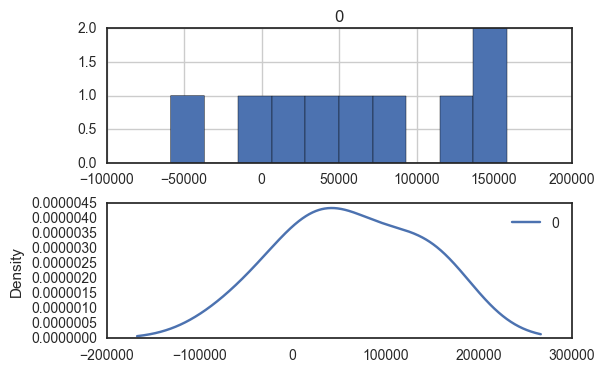

In [120]:
# prepare training dataset
X = d_tiss_modelo.VALOR_PROCEDIMENTO.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
# difference data
    months_in_year = 6
    diff = difference_Series2(history, months_in_year)
    model = ARIMA(diff, order=(1,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)    
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

In [121]:
# constante de polarização
bias = 62526.582669

Podemos usar essa informação para fazer previsões de polarização, adicionando o erro residual médio de 62526.582669 a cada previsão feita.

O exemplo abaixo executa essa correlação de polarização.

RMSE: 69506.980
                  0
count  9.000000e+00
mean  -2.124580e-07
std    7.372329e+04
min   -1.211413e+05
25%   -4.877840e+04
50%   -1.879577e+03
75%    6.544851e+04
max    9.588754e+04


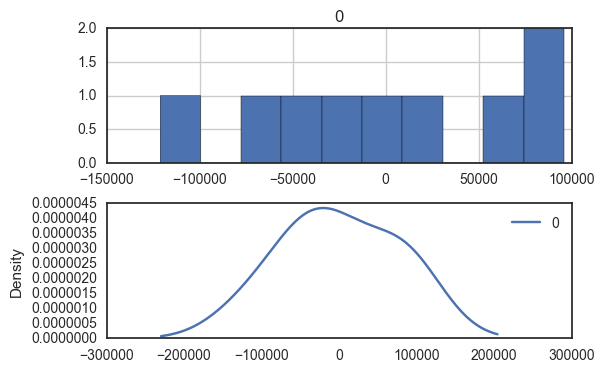

In [122]:
# Carregando os valores
X = d_tiss_modelo.VALOR_PROCEDIMENTO.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
# difference data
    months_in_year = 6
    diff = difference_Series2(history, months_in_year)
    model = ARIMA(diff, order=(1,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)    
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

Ha uma pequena melhora no desempenho das previsões, o RMSE passou de 93492.213 para 69506.980. O resumo dos erros residuais de previsão mostra que a média foi de fato movida para um valor mais próximo de zero.

Uma boa prática também é verificar as séries temporais dos erros residuais para qualquer tipo de autocorrelação. Se presente, sugere que o modelo tem mais condições de modelar a estrutura temporal nos dados.

O exemplo abaixo recalcula os erros residuais e cria gráficos ACF e PACF para verificar qualquer autocorrelação significativa.

                   0
count       9.000000
mean    62526.582669
std     73723.285599
min    -58614.756962
25%     13748.182158
50%     60647.005975
75%    127975.094125
max    158414.127403


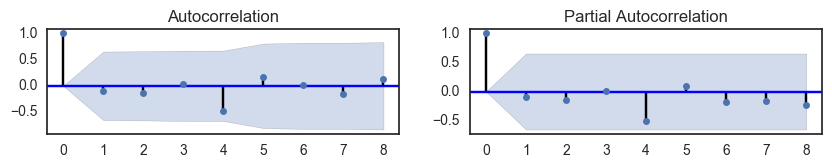

In [123]:
# Carregando os valores
X = d_tiss_modelo.VALOR_PROCEDIMENTO.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# difference data
    months_in_year = 6
    diff = difference_Series2(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure(1)
plt.subplots(1, 2, figsize=(10,3))
plt.subplot(221)
plot_acf(residuals, ax=plt.gca())
plt.subplot(222)
plot_pacf(residuals, ax=plt.gca())
plt.show()

In [124]:
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

X = d_tiss_modelo.VALOR_PROCEDIMENTO.values.astype('float32')
# difference data
months_in_year = 6
diff = difference_Series2(X, months_in_year)
# fit model
model = ARIMA(diff, order=(1,0,0))
model_fit = model.fit(trend='nc', disp=0)
# Salvando o modelo
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=586035.116, Expected=546354
>Predicted=520148.989, Expected=585598
>Predicted=598107.341, Expected=537464
>Predicted=598662.202, Expected=596783
>Predicted=449886.455, Expected=545774
>Predicted=615911.553, Expected=626770
>Predicted=632942.330, Expected=723624
>Predicted=728102.202, Expected=697669
>Predicted=656870.527, Expected=535729
RMSE: 68860.742


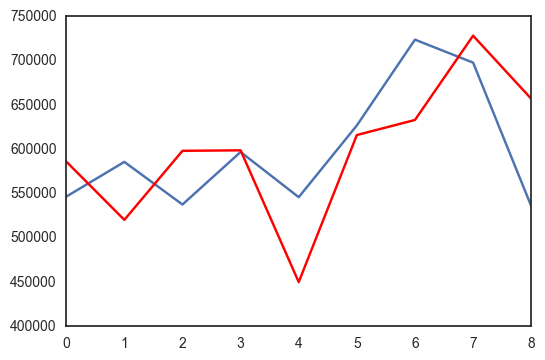

In [125]:
# Carregando os valores
X = d_tiss_modelo.VALOR_PROCEDIMENTO.values.astype('float32')
size = int(len(X) * 0.50)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#history = [x for x in X]
months_in_year = 6
#validacao = pd.read_csv('validacao.csv', decimalt=b',')
y = test
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    months_in_year = 6
    diff = difference_Series2(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = float(model_fit.forecast()[0])
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()

Em relação as previsões que serviram de medida de desenpenho inicial, tinhamos um RMSE de 76644.529, com o modelo ARIMA chegamos ao RMSE de 68860.742.

In [126]:
# Carregando os valores
X = d_tiss_modelo.VALOR_PROCEDIMENTO.values
days_in_year = 6
differenced = difference_Series2(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(1,0,0))
model_fit = model.fit(trend='nc', disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                -153.258
Method:                       css-mle   S.D. of innovations          84367.805
Date:                Sat, 30 Sep 2017   AIC                            310.517
Time:                        22:15:20   BIC                            311.487
Sample:                             0   HQIC                           310.158
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ar.L1.y        0.4547      0.245      1.856      0.090        -0.025     0.935
                                    Roots                                    
                 Real           Imaginary           M

In [127]:
# Carregando os valores
X = d_tiss_modelo.VALOR_PROCEDIMENTO.values
months_in_year = 6
differenced = difference_Series2(X, months_in_year)
# Carregando o modelo
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=3)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
mes = 1
for yhat in forecast:
    inverted = bias + inverse_difference(history, yhat, months_in_year)
    print('mes %d 2017: %f' % (mes, inverted))
    history.append(inverted)
    mes += 1

mes 1 2017: 658520.485654
mes 2 2017: 607941.924915
mes 3 2017: 689133.707292


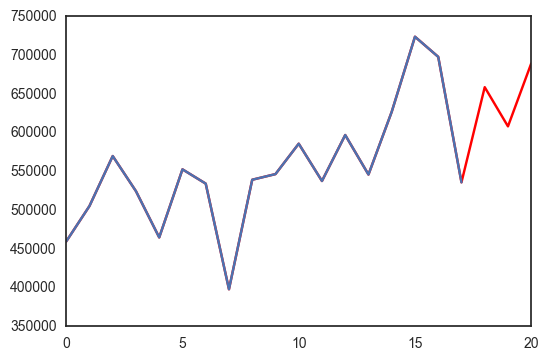

In [128]:
plt.plot(history, color='red')
plt.plot(d_tiss_modelo.VALOR_PROCEDIMENTO.values)

#### Conclusão

Excluindo-se os diagnósticos associados a sintomas, sinais e achados anormais de exames clínicos e de laboratório, não classificados em outra parte, verificamos que nos dados disponibilizado pela Agência Nacional de Saúde Suplementar (ANS) referente aos beneficiários de planos de saúde do estado da Bahia, no período de jan-2015 a dez-2016 foram gastos  ```R$ 75.695.939,77``` com procedimentos realizados em ambiente hospitalar dos estabelecimentos que prestam serviço às operadoras de planos de saúde no estado da Bahia. Conforme demonstrado, as doenças do aparelho geniturinário foi o diagnóstico mais frequente na população, foram gastos ```R$ 9.942.367```, representando cerca de   13,13% dos gastos realizados no período. Calculose do rim e ureter foi a categoria mais frequente dentre os casos diagnosticados, sendo que 39,55% ocorreram em Mulheres e 60,44% em Homens. Com base no modelo ARIMA, a estimativa de gastos com Doenças do aparelho geniturinário no primeiro trimestre de 2017 é de ```R$ 1.955.596,10```.

Quando olhamos separadamente por sexo, Gravidez, parto e puerpério é o diagnóstico mais frequente nas mulheres, enquanto que nos homens o diagnóstico mais frequente são das Doenças do aparelho circulatório.

Os gastos com beneficiários com idade entre 30 e 39 anos, destacam-se como a faixa etária que concentra 24,78% dos gastos realizados no período, podemos perceber que as mulheres utilizam mais os planos de saúde que os homens. Nesta faixa etária as doenças do aparelho geniturinário aparece como o diagnóstico mais frequente.


Referências:

Data Sciece Academy - Curso de Formação Cientista de Dados:
https://www.datascienceacademy.com.br

Machine Learning Mastery:
https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/
https://machinelearningmastery.com/time-series-data-stationary-python/
https://machinelearningmastery.com/make-sample-forecasts-arima-python/

Analytics Vidhya:
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Voo Insights:
https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/

DigitalOcean:
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

DataScience.com:
https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials

Bargava rouseguy
https://github.com/rouseguy/TimeSeriesAnalysiswithPython/blob/master/time_series/5-Model.ipynb

Links úteis:

ANS - Agencia Nacional de Saúde Suplementar:
http://www.ans.gov.br/perfil-do-setor/dados-e-indicadores-do-setor/d-tiss-detalhamento-dos-dados-do-tiss

Datasus:
http://www.datasus.gov.br/cid10/V2008/cid10.htm
